# INN Hotels Project Data Science and Business Analytics PGP

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


## **Data Dictionary**
| Column | Description |
| ------ | ----------- |
| Booking_ID | unique identifier of each booking |
| no_of_adults | Number of adults |
| no_of_children | Number of Children |
| no_of_weekend_nights | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel |
| no_of_week_nights | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel |
| type_of_meal_plan | Type of meal plan booked by the customer |
||   Not Selected – No meal plan selected |
||   Meal Plan 1 – Breakfast |
||   Meal Plan 2 – Half board (breakfast and one other meal) |
||   Meal Plan 3 – Full board (breakfast, lunch, and dinner) |
| required_car_parking_space | Does the customer require a car parking space? (0 - No, 1- Yes) |
| room_type_reserved | Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels |
| lead_time | Number of days between the date of booking and the arrival date |
| arrival_year | Year of arrival date |
| arrival_month | Month of arrival date |
| arrival_date | Date of the month |
| market_segment_type | Market segment designation |
| repeated_guest | Is the customer a repeated guest? (0 - No, 1- Yes) |
| no_of_previous_cancellations | Number of previous bookings that were canceled by the customer prior to the current booking |
| no_of_previous_bookings_not_canceled | Number of previous bookings not canceled by the customer prior to the current booking |
| avg_price_per_room | Average price per day of the reservation; prices of the rooms are dynamic. (in euros) |
| no_of_special_requests | Total number of special requests made by the customer (e.g. high floor, view from the room, etc) |
| booking_status | Flag indicating if the booking was canceled or not. |

## Importing necessary libraries and data

In [1]:
# Installing the libraries with the specified version.
#!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 statsmodels==0.14.1 -q --user

In [2]:
# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

# Libraries to tune decision tree models
from sklearn.model_selection import GridSearchCV

# Libaries to perform statistical analysis
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms
from statsmodels.tools.tools import add_constant

# To get diferent metric scores
from sklearn.metrics import (f1_score,
                             accuracy_score,
                             recall_score,
                             precision_score,
                             confusion_matrix,
                             roc_auc_score,
                             roc_curve,
                             make_scorer,
                             precision_recall_curve,
                              )

# Use this code to suppress  warnings
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

In [3]:
# Mount drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load data

In [4]:
# Display float numbers with two digits to
# the right of the decimal point.
pd.set_option("display.float_format", lambda x: "%.2f" % x)

In [5]:
# Load data
df = pd.read_csv(
    "/content/drive/MyDrive/DataScience/INNHotels_DSBA_Project/INNHotelsGroup.csv"
)

## Data Overview

In [6]:
# Top five rows
df.head(5)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [7]:
# Bottom five rows
df.tail(5)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270              167.80                       1   Not_Canceled  
36271               90.95                       2       Canceled  
36272               98.39                       2   Not_Canceled  
36273               94.50                       0       Canceled  
36274              161.67                       0   Not_Canceled

In [8]:
# Examine the shape of the data
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 36275 rows and 19 columns.


In [9]:
# Examine the data types of each variable
df.info()
print("-" * 50)

# Summary of data types
print("There are ", len(df.dtypes.unique()),
      " data types in the dataset", sep = '')

# print number of variables with object data type
print("\t", df.dtypes.unique()[0], ": ",
      len(df.dtypes[df.dtypes == "object"]), sep = '')

# print number of variables with integer data type
print("\t", df.dtypes.unique()[1], ": ",
      len(df.dtypes[df.dtypes == "int64"]), sep = '')

# print number of variables with float data type
print("\t", df.dtypes.unique()[2], ": ",
      len(df.dtypes[df.dtypes == "float64"]), sep = '')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [10]:
# Continuous variable summary
df.describe().T

count    mean   std     min     25%  \
no_of_adults                         36275.00    1.84  0.52    0.00    2.00   
no_of_children                       36275.00    0.11  0.40    0.00    0.00   
no_of_weekend_nights                 36275.00    0.81  0.87    0.00    0.00   
no_of_week_nights                    36275.00    2.20  1.41    0.00    1.00   
required_car_parking_space           36275.00    0.03  0.17    0.00    0.00   
lead_time                            36275.00   85.23 85.93    0.00   17.00   
arrival_year                         36275.00 2017.82  0.38 2017.00 2018.00   
arrival_month                        36275.00    7.42  3.07    1.00    5.00   
arrival_date                         36275.00   15.60  8.74    1.00    8.00   
repeated_guest                       36275.00    0.03  0.16    0.00    0.00   
no_of_previous_cancellations         36275.00    0.02  0.37    0.00    0.00   
no_of_previous_bookings_not_canceled 36275.00    0.15  1.75    0.00    0.00   
avg_price_per_room                   36275.00  103.42 35.09    0.00   80.30   
no_of_special_requests               36275.00    0.62  0.79    0.00    0.00   

                                         50%     75%     max  
no_of_adults                            2.00    2.00    4.00  
no_of_children                          0.00    0.00   10.00  
no_of_weekend_nights                    1.00    2.00    7.00  
no_of_week_nights                       2.00    3.00   17.00  
required_car_parking_space              0.00    0.00    1.00  
lead_time                              57.00  126.00  443.00  
arrival_year                         2018.00 2018.00 2018.00  
arrival_month                           8.00   10.00   12.00  
arrival_date                           16.00   23.00   31.00  
repeated_guest                          0.00    0.00    1.00  
no_of_previous_cancellations            0.00    0.00   13.00  
no_of_previous_bookings_not_canceled    0.00    0.00   58.00  
avg_price_per_room                     99.45  120.00  540.00  
no_of_special_requests                  0.00    1.00    5.00

_Observations_:
* The **average price per room** ranges from 0 (free) to 540 euros, with a median of 99.45.
* **Lead time** ranges from 0 to 443 days (> 1 year), with a median of 57.
* Several variables have 0 as the median value, such as **no_of_children**, **required_car_parking_space**, **repeated_guest**, **no_of_previous_cancellations**, **no_of_previous_bookings_not_canceled**, and **no_of_special_requests**. These may be variables that apply to only a small number of guests.

In [11]:
# Check for missing values
df.isnull().sum()
print("There are", df.isnull().sum().sum(),
      "missing values in the dataset."
      )

There are 0 missing values in the dataset.


In [12]:
# Check for duplicated values
df.duplicated().sum()
print("There are", df.duplicated().sum(),
      "duplicated values in the dataset."
      )

There are 0 duplicated values in the dataset.


In [13]:
# Drop booking ID since it has no analytical value
df.drop("Booking_ID", axis=1, inplace=True)

## Exploratory Data Analysis (EDA)

### 1. What are the busiest months in the hotel?

In [14]:
# Make a function to visualize continuous variables


def hist_and_boxt(data, attribute):

    # Create variables for 5 number summary
    Min = round(data[attribute].quantile(0), 2)
    Q1 = round(data[attribute].quantile(0.25), 2)
    Q3 = round(data[attribute].quantile(0.75), 2)
    Max = round(data[attribute].quantile(1), 2)
    median = round(data[attribute].median(), 2)

    # Creating the 2 subplots
    fhb, (boxy, histy) = plt.subplots(
        2,  # 2 rows
        1,  # 1 column
        gridspec_kw={"height_ratios": (0.30, 0.70)},
        sharex=True,  # shared x-axis between plots
        figsize=(8, 4),
    )

    # Modify figure borders
    for ax in fhb.get_axes():
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)

    # Box plot (top plot)
    sns.boxplot(
        data=data,
        x=attribute,
        ax=boxy,
        showmeans=True,
        meanline=True,
        meanprops={"color": "black"},
        medianprops={"color": "black"},
        color="green",
        linewidth=2,
    )

    # Histogram (bottom plot)
    sns.histplot(
        data=data,
        x=attribute,
        facecolor="green",
        ax=histy,
        edgecolor="black",
        linewidth=2,
    )

    # Get maximum y-value for plot
    lims = histy.get_ylim()[1]

    # names for five number summary labels
    five_ns_lbls = ["Min", "Q1", "Median", "Q3", "Max"]

    # five number summary values
    five_ns = [Min, Q1, median, Q3, Max]

    # Label histogram with five number summary
    for i, lbl in enumerate(five_ns_lbls):
        plt.text(
            x=five_ns[i],
            y=lims * (i * 0.25),
            s=f"{lbl}: {five_ns[i]}",
            color="black",
            ha="center",
            bbox=dict(facecolor="white", alpha=1, edgecolor="black"),
        )

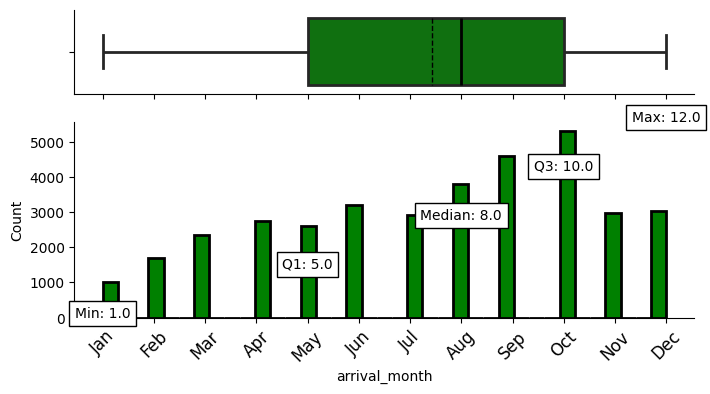

In [15]:
# Plot bookings by month
hist_and_boxt(df, "arrival_month")

# Rename months
month_dict = {
    1: "Jan",
    2: "Feb",
    3: "Mar",
    4: "Apr",
    5: "May",
    6: "Jun",
    7: "Jul",
    8: "Aug",
    9: "Sep",
    10: "Oct",
    11: "Nov",
    12: "Dec",
}

# Replot x-axis with new month names
plt.xticks(list(month_dict.keys()),
           list(month_dict.values()),
           fontsize=12
           )

# Put x-labels on 45 degree tilt
plt.xticks(rotation=45, fontsize=12);

_Observations_:
* Bookings increase in late summer/fall, but drop dramatically in the winter.
* The busiest months are (in order)
  1. October
  2. September
  3. August

### 2. Which market segment do most of the guests come from?

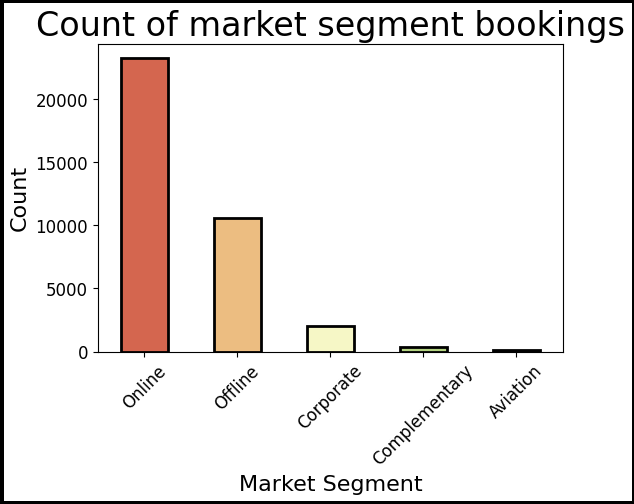

In [16]:
# Make countplot of bookings across market segment

# Create figure template
plt.figure(figsize=(6, 4), edgecolor="black", linewidth=5)

# Make countplot
sns.countplot(
    data=df,
    x="market_segment_type",
    palette="RdYlGn",
    order=df["market_segment_type"].value_counts().index,
    edgecolor="black",
    linewidth=2,
    width=0.5
)

# Figure details
plt.xlabel("Market Segment", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Count of market segment bookings", fontsize=24)

# Show figure
plt.show()

_Observations_:
* Most bookings are online.
* Very few bookings are aviation or complementary.

### 3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

In [17]:
# Make function to examine average price per room
# across different variables

def bvar_box(data, x, y):

    # Figure template
    plt.figure(figsize=(6, 6),
               edgecolor="black",
               linewidth=5
               )

    # Create boxplot
    sns.boxplot(data=df,
                x=x,
                y=y,
                palette="RdYlGn",
                width=0.5,
                showmeans=True,
                meanline=True,
                meanprops={"color": "black"},
                medianprops={"color": "black"},
                )

    # Figure details
    sns.despine()
    plt.xlabel(x, fontsize=16, fontweight="bold")
    plt.ylabel(y, fontsize=16, fontweight="bold")
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)

    # Black line on x and y axes
    plt.axhline(y=0, color="black", linewidth=1)
    plt.axvline(x=-0.5, color="black", linewidth=3)

    # Show plot
    plt.show()

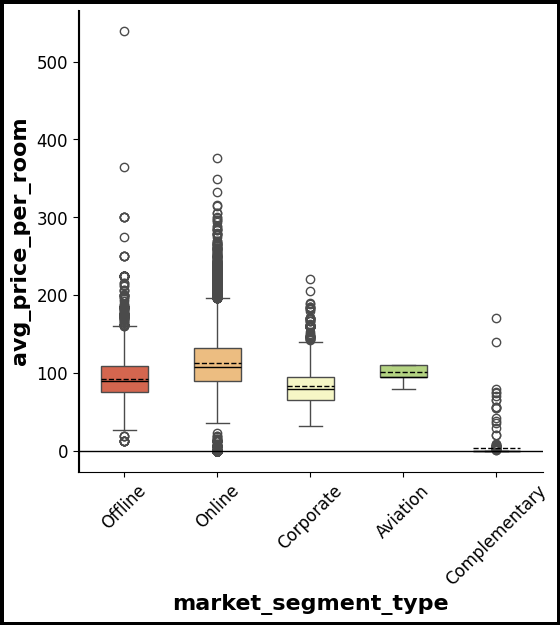

In [18]:
# Look at histograms of average price by market segment
bvar_box(df, "market_segment_type", "avg_price_per_room")

_Observations_:
* Online bookings tend to yield higher room prices.
* Online bookings also appear to have the most variance.
* Aviation bookings have very low variance.
* Corporate and complementary bookings come at a discount.

### 4. What percentage of bookings are canceled?

In [19]:
# Percentage of bookings that are canceled
Perc_cancelled = df["booking_status"].value_counts(normalize=True)

print(
    "Percentage of bookings that are canceled: ",
    round(df["booking_status"].value_counts(normalize=True)[1] * 100, 2),
    "%.",
    sep="",
)

Percentage of bookings that are canceled: 32.76%.


### 5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

In [20]:
# Isolate the repeat guests
Repeats = df[df["repeated_guest"] > 0]

# Percentage that cancel
print(
    "Percentage of repeating guests that cancel: ",
    round(Repeats["booking_status"].value_counts(normalize=True
                                                 )[1] * 100,
          2),
    "%.",
    sep="",
)

Percentage of repeating guests that cancel: 1.72%.


_Note_: It's difficult to know whether the same guests are canceling or if these are all different guests.

### 6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [21]:
# Make a function to look at the proportion
# of canceled bookings by different variables


def bvar_stacked(data, x, y):

    # Create matrix of data and plot as a stacked barplot
    prop_fig = pd.crosstab(data[x], data[y], normalize="index").plot(
        kind="bar",
        figsize=(7, 4),
        stacked=True,
        edgecolor="black",
        linewidth=2,
        color=["red", "green"],
    )

    # border around entire figure
    prop_fig.spines[["top", "right", "left"]].set_visible(False)
    prop_fig.tick_params(axis="both", left=False, bottom=False)

    # Figure details
    plt.xlabel(x, fontsize=16, fontweight="bold")
    plt.ylabel("Proportion", fontsize=16, fontweight="bold")
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    sns.move_legend(
        prop_fig,
        "upper left",
        bbox_to_anchor=(1, 1),
    )
    prop_fig.set_xlabel(x)
    prop_fig.set_ylabel("Proportion")
    plt.xticks(rotation=45)

    # Black line on x and y axes
    plt.axhline(y=0, color="black", linewidth=3)
    plt.axvline(x=-0.5, color="black", linewidth=3)

    # show plot
    plt.show();

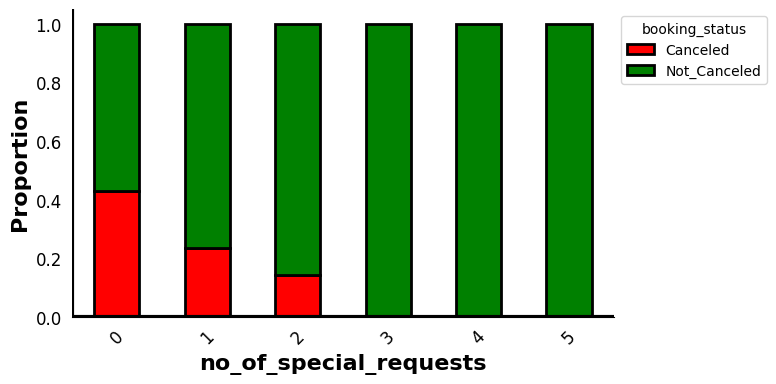

In [22]:
# Look at the proportion of canceled bookings by type of room reserved
bvar_stacked(df, "no_of_special_requests", "booking_status");

_Observations_: In general, the proportion of cancellations goes down with additional requests.


### Univariate Analysis

#### Categorical Variables

------------------------------------------------------------------------------------------------------
                                             no_of_adults                                             
------------------------------------------------------------------------------------------------------


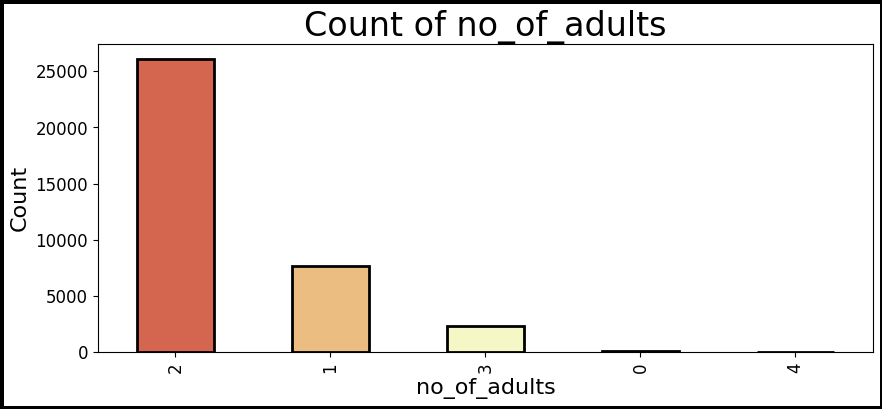

------------------------------------------------------------------------------------------------------
                                            no_of_children                                            
------------------------------------------------------------------------------------------------------


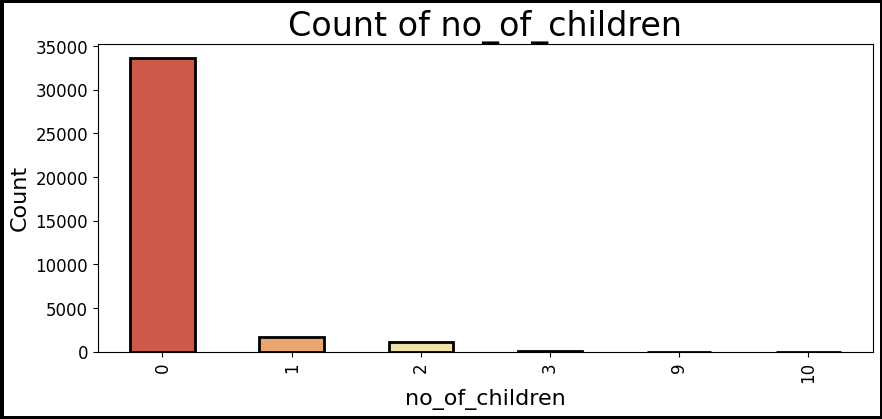

------------------------------------------------------------------------------------------------------
                                         no_of_weekend_nights                                         
------------------------------------------------------------------------------------------------------


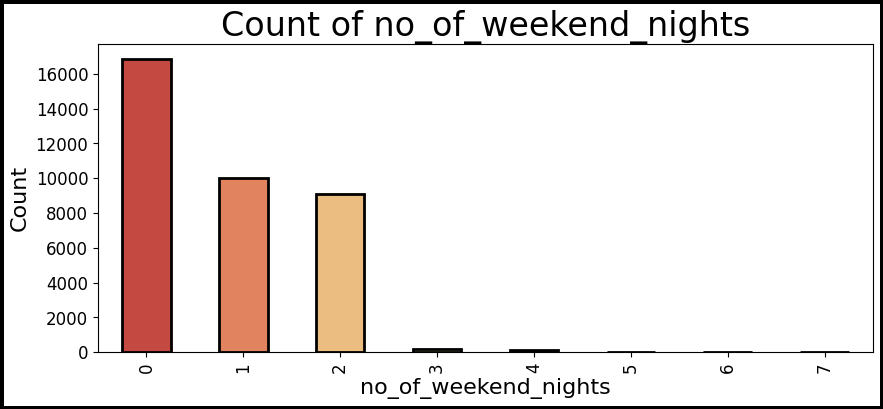

------------------------------------------------------------------------------------------------------
                                          no_of_week_nights                                           
------------------------------------------------------------------------------------------------------


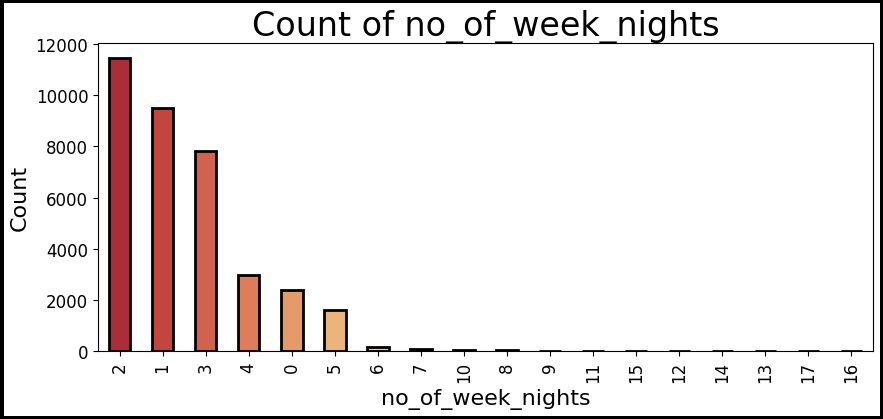

------------------------------------------------------------------------------------------------------
                                      required_car_parking_space                                      
------------------------------------------------------------------------------------------------------


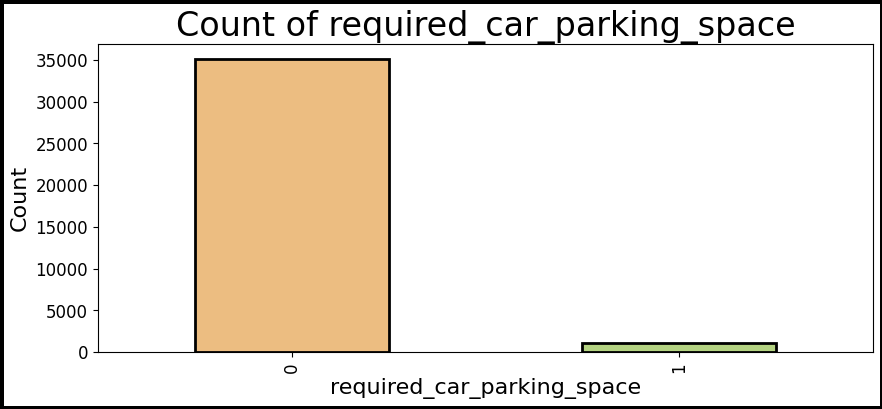

------------------------------------------------------------------------------------------------------
                                            repeated_guest                                            
------------------------------------------------------------------------------------------------------


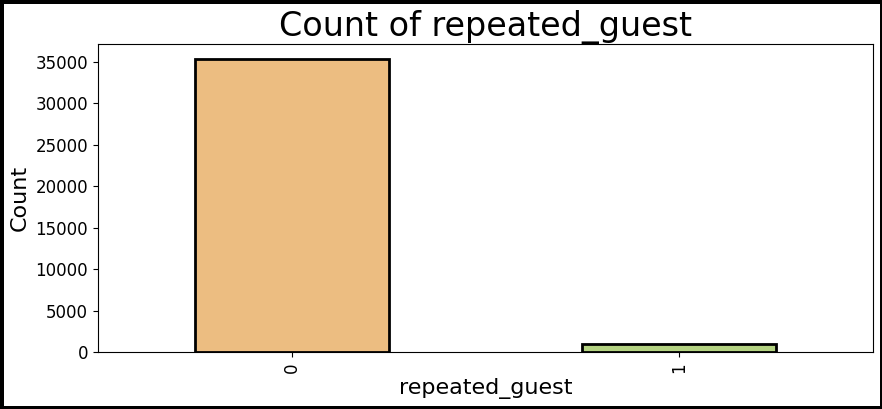

------------------------------------------------------------------------------------------------------
                                     no_of_previous_cancellations                                     
------------------------------------------------------------------------------------------------------


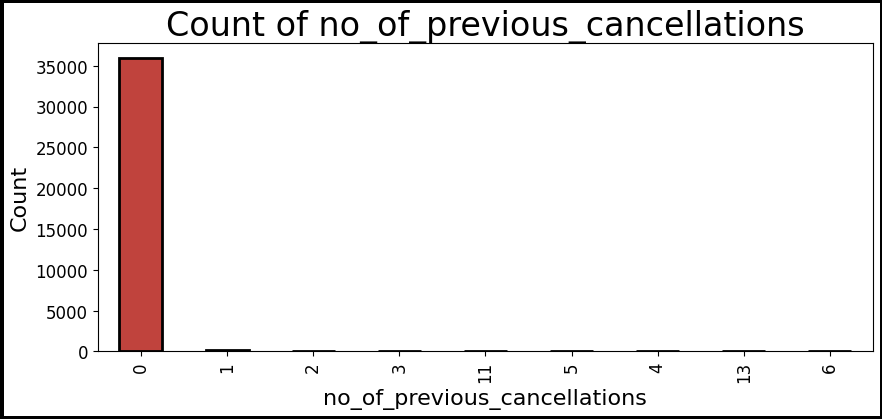

------------------------------------------------------------------------------------------------------
                                 no_of_previous_bookings_not_canceled                                 
------------------------------------------------------------------------------------------------------


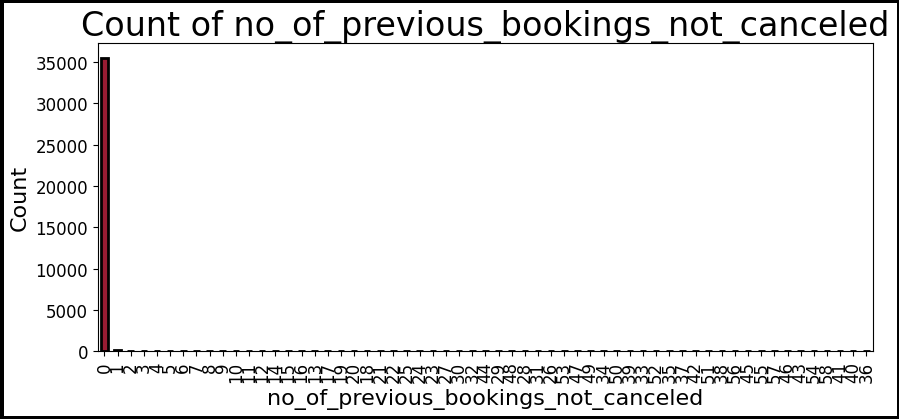

------------------------------------------------------------------------------------------------------
                                        no_of_special_requests                                        
------------------------------------------------------------------------------------------------------


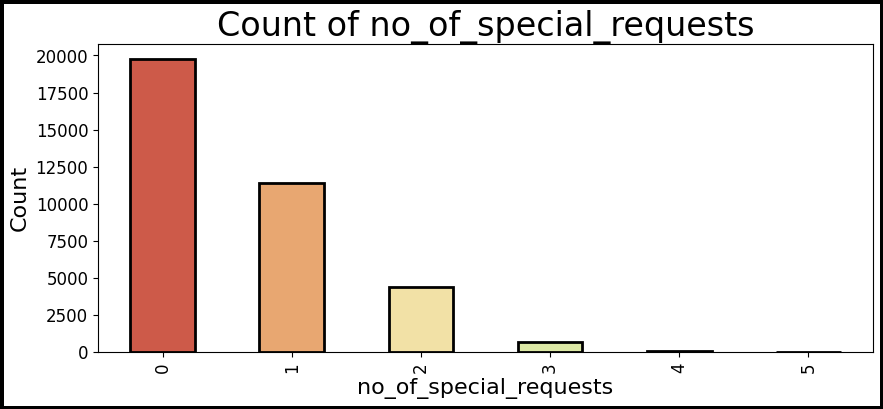

------------------------------------------------------------------------------------------------------
                                          type_of_meal_plan                                           
------------------------------------------------------------------------------------------------------


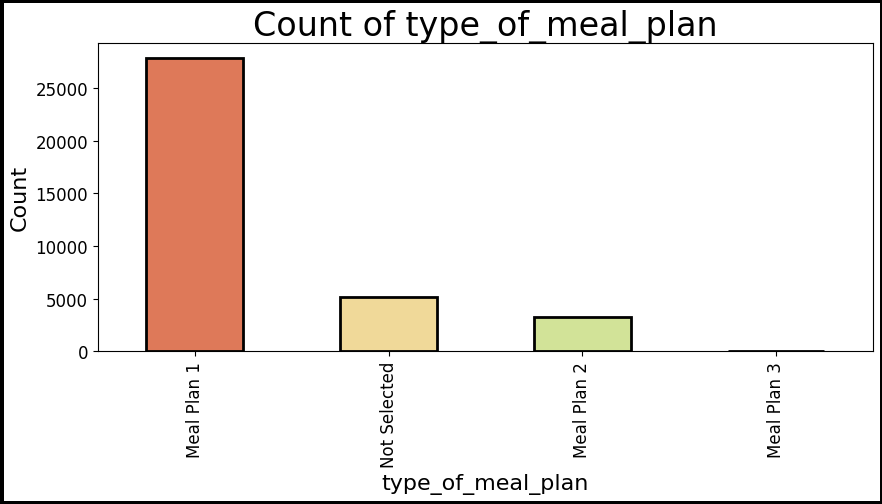

------------------------------------------------------------------------------------------------------
                                          room_type_reserved                                          
------------------------------------------------------------------------------------------------------


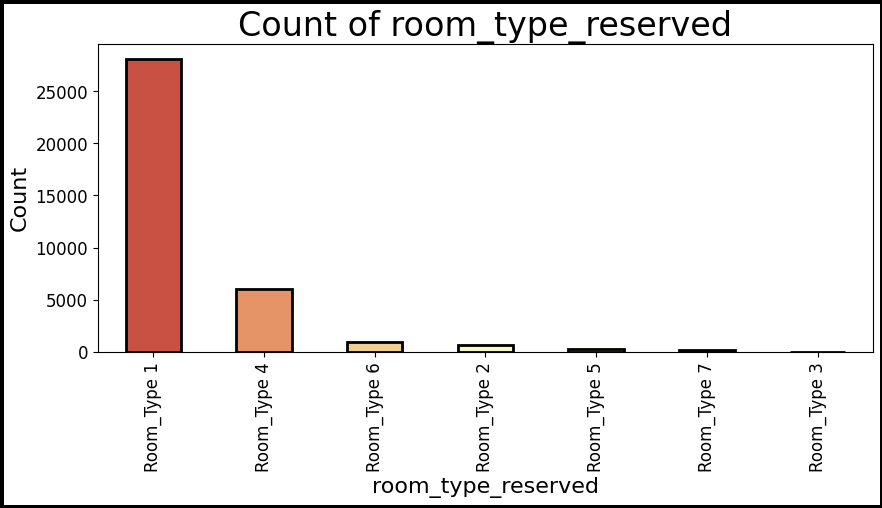

------------------------------------------------------------------------------------------------------
                                         market_segment_type                                          
------------------------------------------------------------------------------------------------------


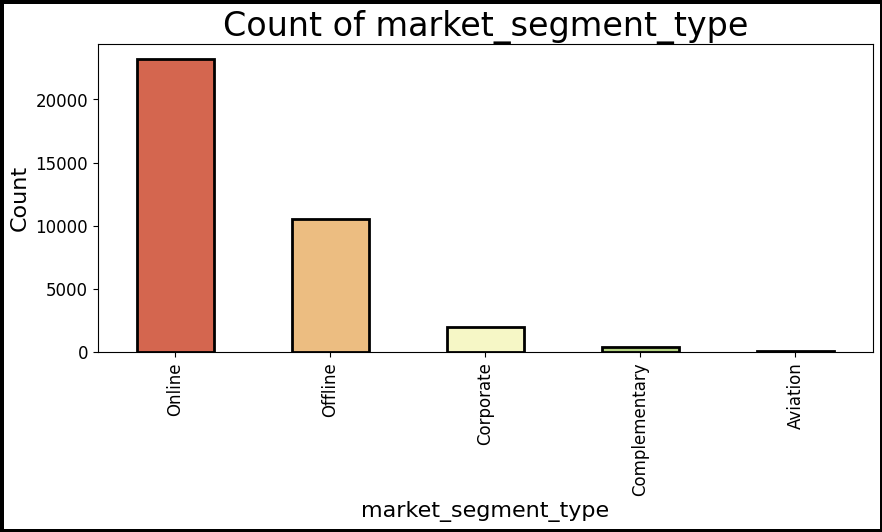

------------------------------------------------------------------------------------------------------
                                            booking_status                                            
------------------------------------------------------------------------------------------------------


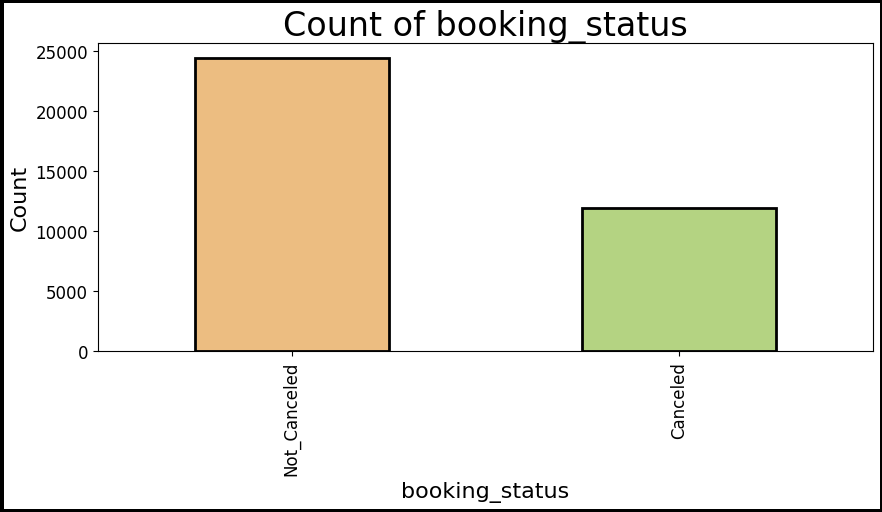

------------------------------------------------------------------------------------------------------
                                             arrival_year                                             
------------------------------------------------------------------------------------------------------


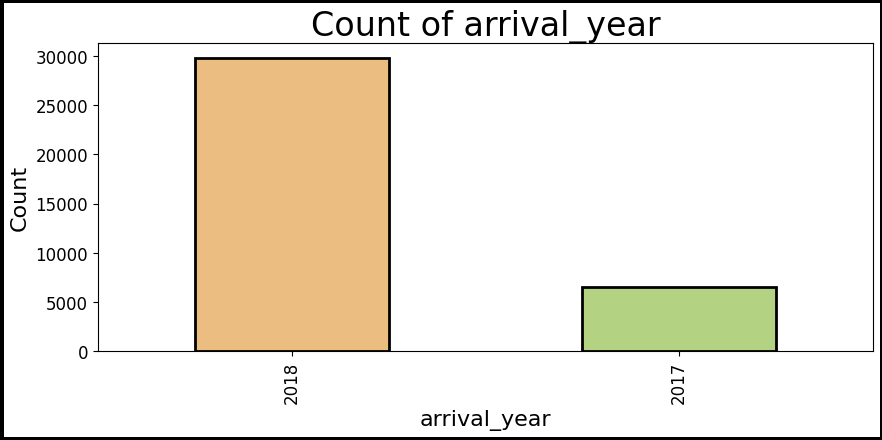

In [23]:
# Categorical variables
df_cat = df[
    [
        "no_of_adults",
        "no_of_children",
        "no_of_weekend_nights",
        "no_of_week_nights",
        "required_car_parking_space",
        "repeated_guest",
        "no_of_previous_cancellations",
        "no_of_previous_bookings_not_canceled",
        "no_of_special_requests",
        "type_of_meal_plan",
        "room_type_reserved",
        "market_segment_type",
        "booking_status",
        "arrival_year",
    ]
]

# Make a plot for each categorical variable
for i in df_cat:

    # Create figure template
    plt.figure(figsize=(10, 4),
               edgecolor="black",
               linewidth=5
               )

    # Separating text
    print("-" * 102)
    txt = i
    print(txt.center(102))
    print("-" * 102)

    # Make countplot
    sns.countplot(
        data=df_cat,
        x=i,
        palette="RdYlGn",
        order=df[i].value_counts().index,
        edgecolor="black",
        linewidth=2,
        width=0.5
    )

    # Figure details
    plt.xlabel(i, fontsize=16)
    plt.ylabel("Count", fontsize=16)
    plt.xticks(rotation=90, fontsize=12)
    plt.yticks(fontsize=12)
    plt.title("Count of " + i, fontsize=24)

    # Show figure
    plt.show()

_Observations (categorical variables)_:
* The majority of bookings involve 2 adults and 0 children.
* Generally, bookings are for 1 or 2 weekdays, but also sometimes for weekends.
* The overwhelming majority of customers are new and don't need a parking space.
* The overwhelming majority of customers never cancel a booking, but some customers cancel many bookings.
* The most popular room types are 1 and 4.
* Most customers have 0 or 1 special requests.
* Most customers prefer only breakfast (Meal Plans 1) or none at all.
* Most customers book online, but there is a significant number of customers who book offline.
* 32.7% of all bookings are canceled.
* The overwhelming majority of bookings are for the year 2018.

#### Continuous Variables

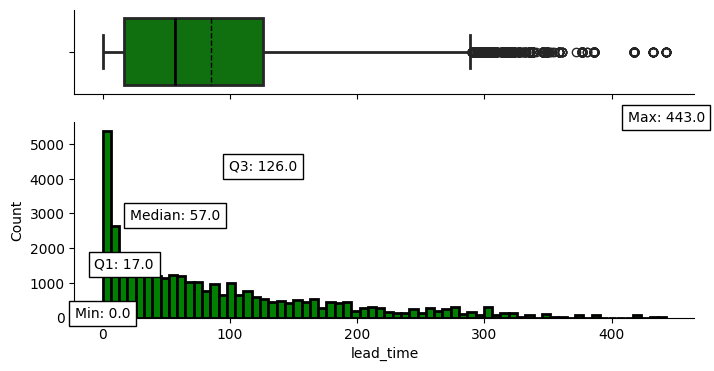

In [24]:
# Lead time
hist_and_boxt(df, "lead_time")

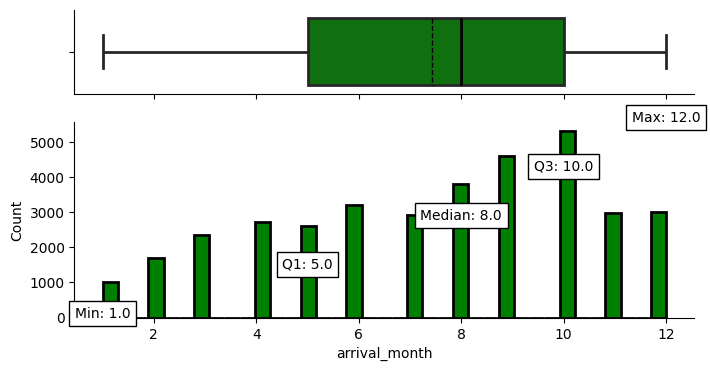

In [25]:
# Arrival month
hist_and_boxt(df, "arrival_month")

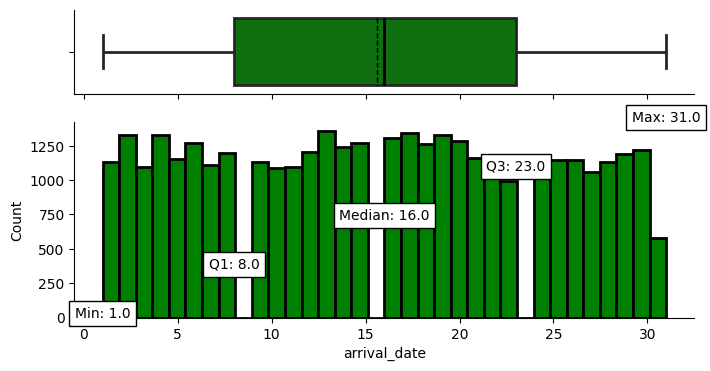

In [26]:
# Arrival date
hist_and_boxt(df, "arrival_date")

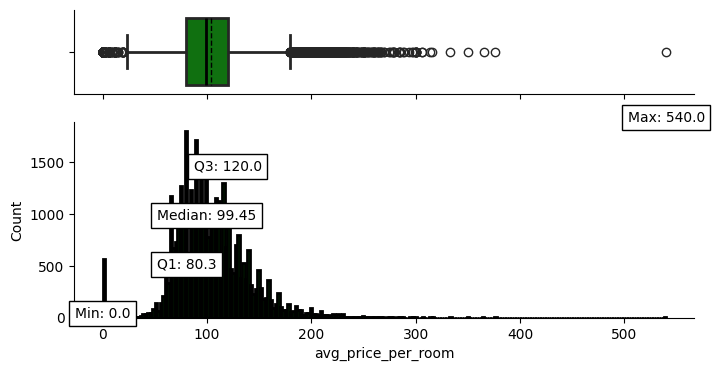

In [27]:
# Average price per room
hist_and_boxt(df, "avg_price_per_room")

_Observations (continuous variables)_:
* Bookings tend to happen nearer to the stay date, with the median of 57 days.
* Bookings increase in late summer/fall, but drop dramatically in the winter.
* The distribution for arrival date is uniform: There is no arrival date that appears to be more common.
* The median price per room is 99.45 euros, but the distribution is right-skewed: There are several expensive bookings that are made.
* A non-trivial portion of the bookings are free.

### Bivariate Analysis

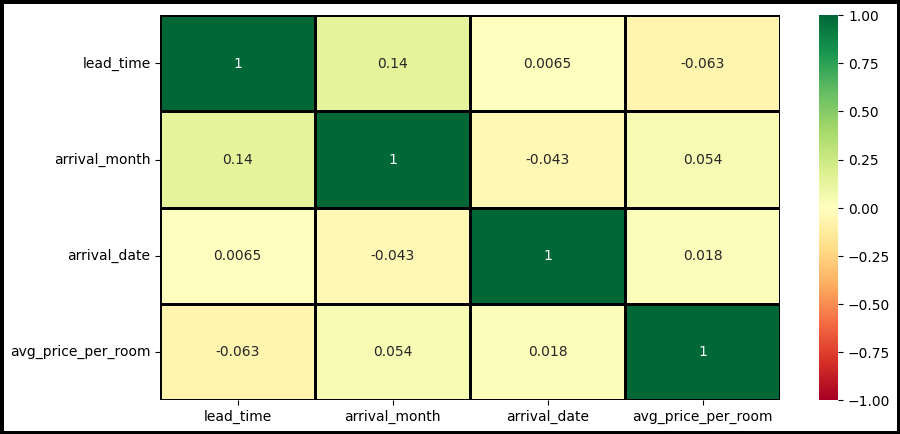

In [28]:
# Make heatmap of continuous variables
df_cont = df[["lead_time",
              "arrival_month",
              "arrival_date",
              "avg_price_per_room"
              ]]

# Figure template
plt.figure(figsize=(10, 5),
           edgecolor="black",
           linewidth=5
           )

# Heat map
sns.heatmap(
    df_cont.corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    cmap="RdYlGn",
    linewidths=2,
    linecolor="black",
)

# Show plot
plt.show()

_Observations_:
* The strongest positive correlation is between arrival month and lead time (0.14):
  * As the lead time increases, the booking date increases.
* The strongest negative correlation is between average price per room and lead time (-0.063):
  * As the lead time increases, the average price per room decreases.

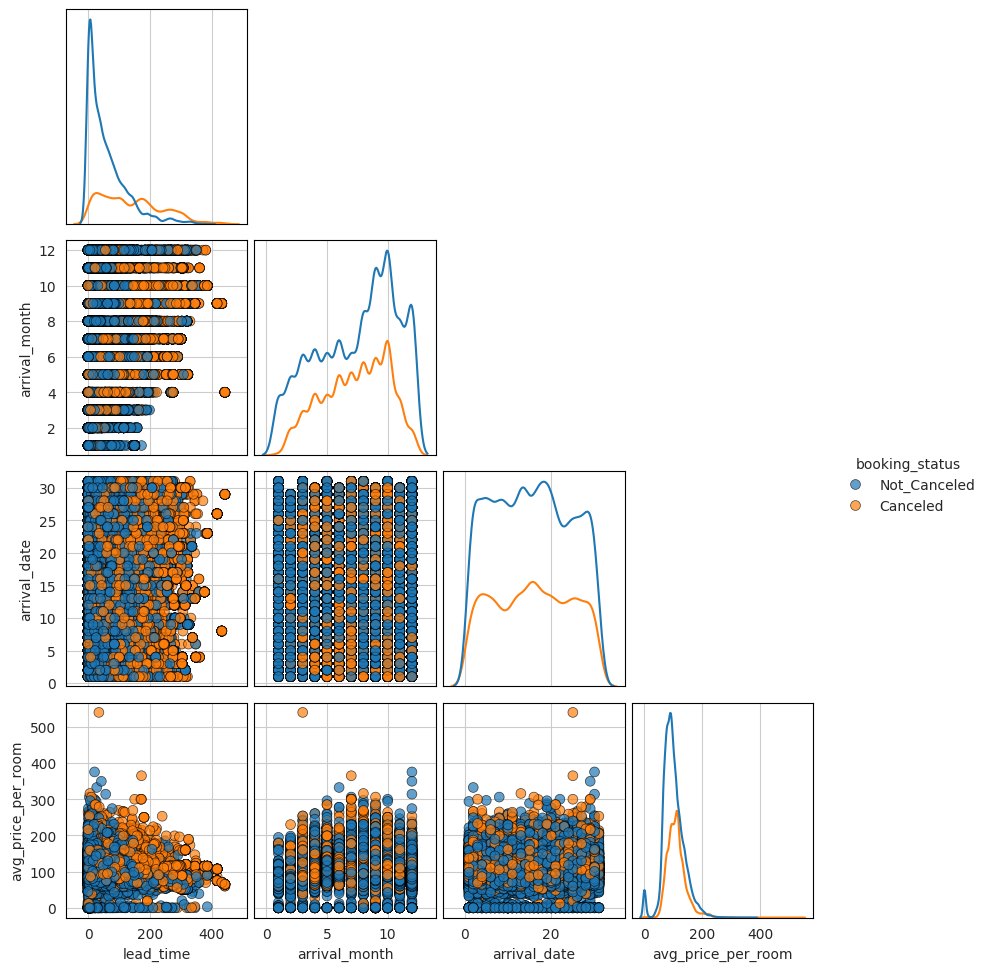

In [29]:
# Pair plot of all continuous variables

# Continuous variables
df_pp_cols = [
    "lead_time",
    "arrival_month",
    "arrival_date",
    "avg_price_per_room",
    "booking_status",
]

# Create pairplot
sns.set_style("whitegrid")
pp = sns.pairplot(
    data=df[df_pp_cols],
    corner=True,
    diag_kind="kde",
    hue="booking_status",  # split data by booking status
    kind="scatter",
    plot_kws={
        "edgecolor": "black",
        "linewidth": 0.5,
        "alpha": 0.7,
        "s": 50,
        "color": "red",
    },
    diag_kws={"fill": False, "fill": False, "color": "green"},
    height=2,
)

# Customize the plot borders (for the individual subplots)
for ax in plt.gcf().axes:
    ax.spines[["top", "bottom", "left", "right"]].set_edgecolor("black")
    ax.spines[["top", "bottom", "left", "right"]].set_visible(True)

# Set figure size in inches
pp.fig.set_size_inches(10, 10)

# Show plot
plt.show();

_Observations_: No obvious correlations between continuous variables.

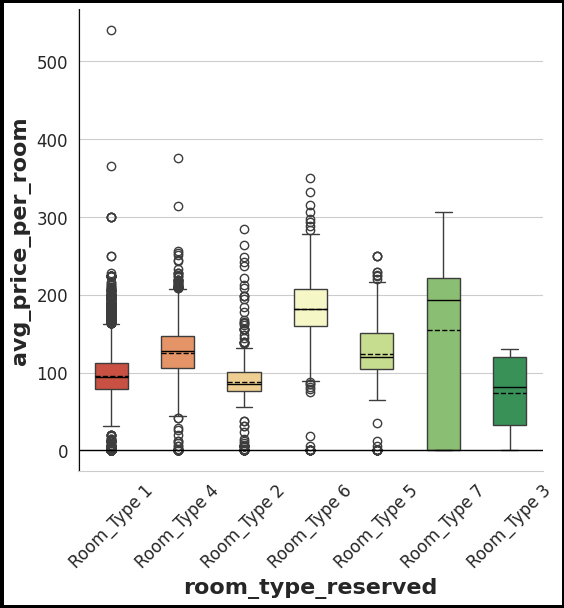

In [30]:
# Look at histograms of average price by room type reservvd
bvar_box(df, "room_type_reserved", "avg_price_per_room")

_Observations_:
* Room type 7 has the most variance in price
* In general, the mean of the average price per room is between 75 and 200 euros, regardless of room type.

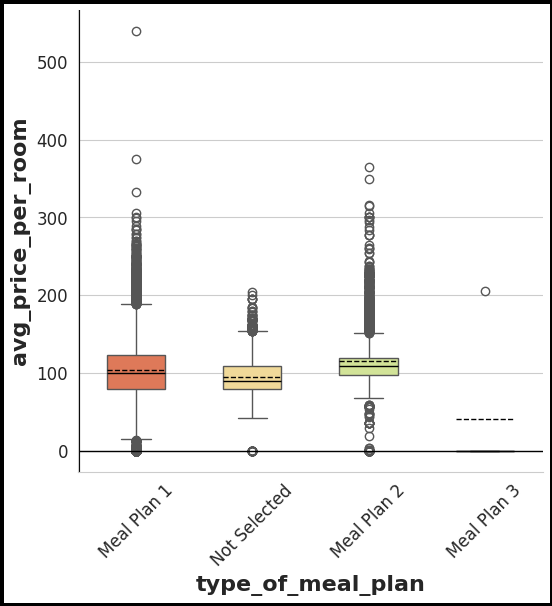

In [31]:
# Look at histograms of average price by meal plan
bvar_box(df, "type_of_meal_plan", "avg_price_per_room")

_Observations_:
* The average price per room doesn't differ much between meal plans 1 and 2.
* Meal plan 3 has one outlier, but overall room prices are zero.
  * Meal plan 3 might be included in a complementary package for some guests.

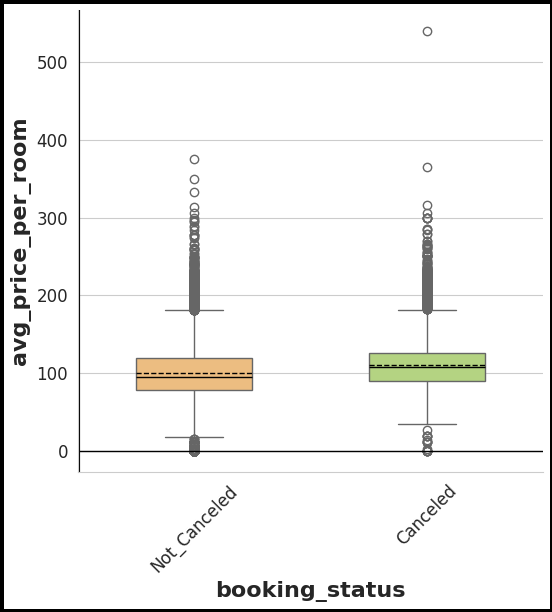

In [32]:
# Look at histograms of average price by booking status
bvar_box(df, "booking_status", "avg_price_per_room")

_Observations_: There doesn't appear to be a difference in the average price per room between canceled and non-canceled bookings.

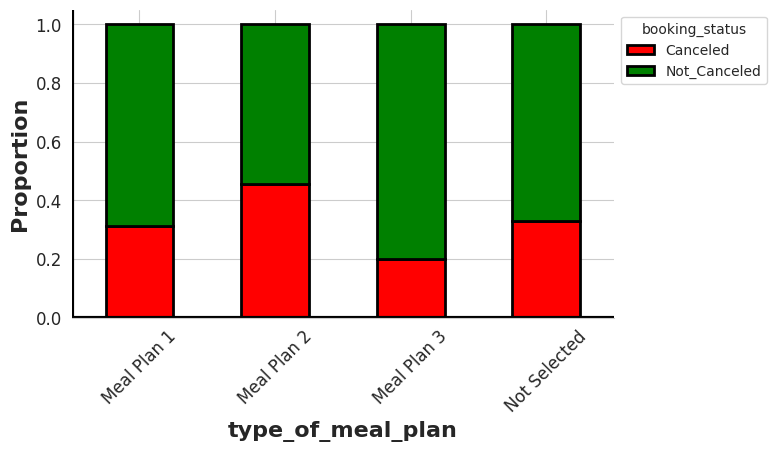

In [33]:
# Look at the proportion of canceled bookings by meal plan
bvar_stacked(df, "type_of_meal_plan", "booking_status");

_Observations_: Meal plan 2 has the highest proportion of cancellations.

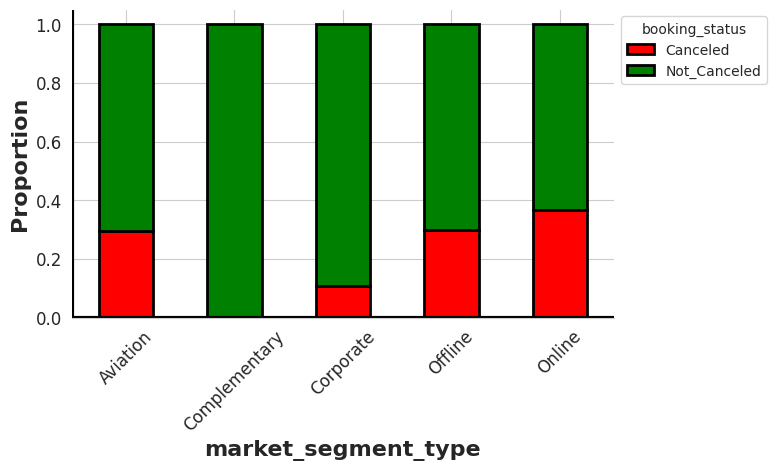

In [34]:
# Look at the proportion of canceled bookings by market segment
bvar_stacked(df, "market_segment_type", "booking_status");

_Observations_:
* Most canceled bookings occur offline, online, or through aviation.
* Few cancelations occur under complementary or corporate bookings.

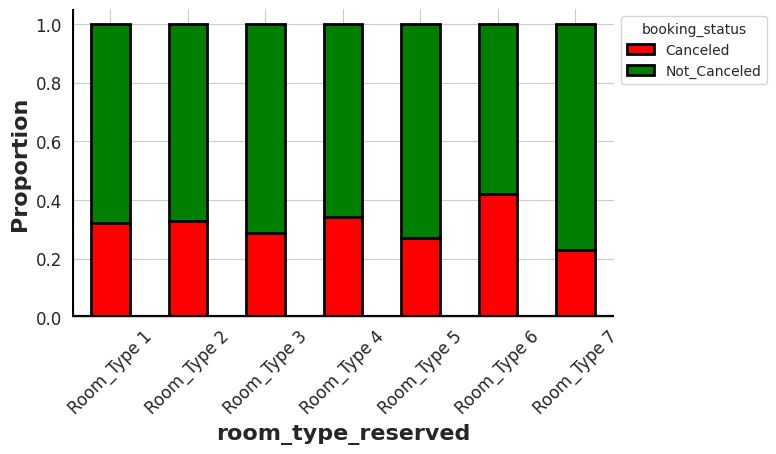

In [35]:
# Look at the proportion of canceled bookings by type of room reserved
bvar_stacked(df, "room_type_reserved", "booking_status");

_Observations_:
* Room type 6 has the highest proportion of canceled bookings.
* Room type 7 has the lowest proportion of canceled bookings.

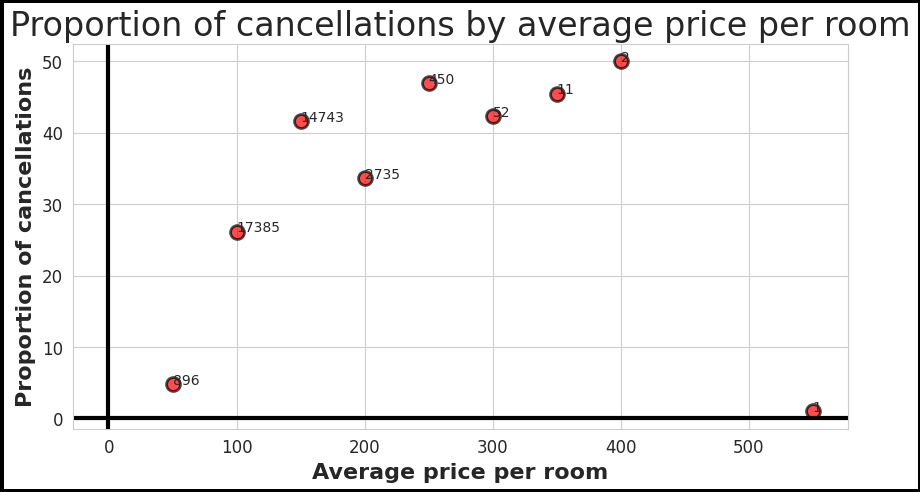

In [36]:
# Look at a scatterplot of average price per
# room and the proportion of cancellations

# Calculate the average cancellation proportion for bins of 50
bins = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550]

bin_canc = []
bin_len = []
for i in bins:
  tmp_bin = df[(df["avg_price_per_room"] < i) &
              (df["avg_price_per_room"] >= i - 50)
              ].reset_index(drop=True)

  bin_len.append(len(tmp_bin))
  if len(tmp_bin) == 0:
    bin_canc.append('Nan')
    continue
  elif len(tmp_bin) == 1:
    bin_canc.append(tmp_bin["booking_status"].value_counts(normalize=True
                                                           ).iloc[0])
    continue
  bin_prop = (tmp_bin["booking_status"].value_counts(normalize=True))*100
  bin_canc.append(bin_prop.iloc[1])

# Scatter plot of bin_canc across bins

# Figure template
plt.figure(figsize=(10, 5),
           edgecolor="black",
           linewidth=5
           )

# Scatter plot
plt.scatter(bins,
            bin_canc,
            color="red",
            marker="o",
            s=100,
            edgecolor="black",
            linewidth=2,
            alpha=0.7
            )

# Figure details
plt.xlabel("Average price per room",
           fontsize=16,
           fontweight="bold"
           );

plt.ylabel("Proportion of cancellations",
           fontsize=16,
           fontweight="bold"
           );

plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

plt.title("Proportion of cancellations by average price per room",
          fontsize=24
          );

for i, txt in enumerate(bin_len):
    if bin_canc[i] == 'Nan':
      continue
    else:
      plt.annotate(txt,
       (bins[i],
        bin_canc[i])
       )


# black solid lines for x and y axis
plt.axhline(y=0,
            color="black",
            linewidth=3
            );

plt.axvline(x=-0.5,
            color="black",
            linewidth=3
            );

# Show plot
plt.show();

_Observations_:
* In general the proportion of cancellations increases up until the 350-400 price range.
* However, the number of entries for each group (numbers next to dots) is low for more expensive rooms so data may not be reliable above the 300 euro mark.
* One very expensive room was canceled.

In [37]:
# Percent cancelled by market segment
df_canc = df[df["booking_status"] == "Canceled"]
prop_canc = (df_canc["market_segment_type"].value_counts() /
            df["market_segment_type"].value_counts())
prop_canc.sort_values(ascending=False)

market_segment_type
Online          0.37
Offline         0.30
Aviation        0.30
Corporate       0.11
Complementary    NaN
Name: count, dtype: float64

_Observations_: The highest proportion of cancellations come from online bookings (36.5%).

## Data Preprocessing

### Missing values

In [38]:
# Missing values|
print("There are", df.isnull().sum().sum(), "missing values in the dataset.")

There are 0 missing values in the dataset.


_Observations_: No need for corrective action.

### Outlier detection and treatment

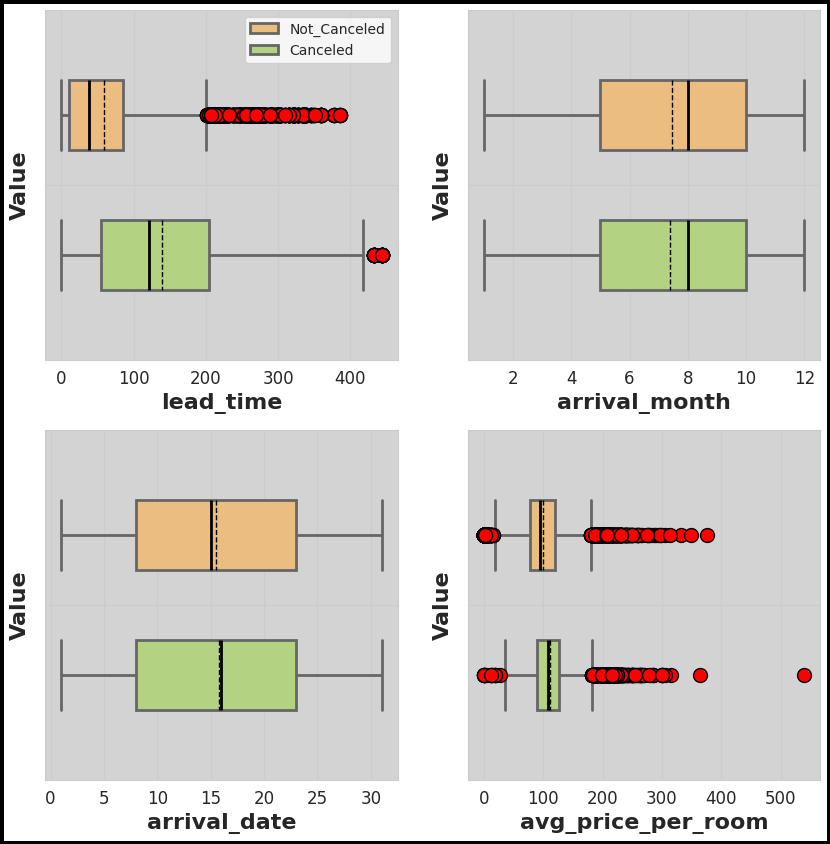

In [39]:
# Plot outliers for continuous variables

# Figure template
plt.figure(figsize=(10, 10), edgecolor="black", linewidth=5)

for i, attribute in enumerate(df_cont):

    # Subplots
    plt.subplot(2, 2, i + 1)

    # boxplot
    sns.boxplot(
        x=attribute,
        data=df,
        hue="booking_status",
        palette="RdYlGn",
        linewidth=2,
        widths=0.2,
        showmeans=True,
        meanline=True,
        color="green",
        meanprops={"color": "black"},
        medianprops={"color": "black"},
        flierprops={
            "marker": "o",
            "markerfacecolor": "red",
            "markeredgecolor": "black",
            "markersize": 10,
            "linestyle": "none",
        },
    )

    # Remove gridlines
    plt.grid(False)

    # Make plot dark grey
    plt.gcf().axes[i].patch.set_facecolor("lightgrey")

    # Only include the legend in the first plot
    if i == 0:
        plt.legend(loc="upper right")
    else:
        # remove legend
        plt.legend().remove()

    # Figure details
    plt.xlabel(attribute, fontsize=16, fontweight="bold")
    plt.ylabel("Value", fontsize=16, fontweight="bold")
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)

# Show plot
plt.show()

_Observations_: There are several outliers, but they aren't outside the realm of legitimate possibilities (e.g., a room can cost 540 euros, a person can book a room more than a year out). Therefore, they will be treated as valid.

### Preparing data for modeling

In [40]:
# Change target variable to ones and zeros
df["booking_status"] = df["booking_status"].map({"Canceled": 1, "Not_Canceled": 0})

In [41]:
# Divide data into predictors and target variables
X = df.drop(["booking_status"], axis=1)
y = df["booking_status"]

# adding a contstant
X = add_constant(X)

# one hot encoding
X = pd.get_dummies(X, drop_first=True)

# change dummy variables from boolean to binary
X = X.astype(int)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

### EDA

- It is a good idea to explore the data once again after manipulating it.

In [42]:
# Examine training data
X_train.head()

const  no_of_adults  no_of_children  no_of_weekend_nights  \
13662      1             1               0                     0   
26641      1             2               0                     0   
17835      1             2               0                     2   
21485      1             2               0                     0   
5670       1             2               0                     1   

       no_of_week_nights  required_car_parking_space  lead_time  arrival_year  \
13662                  1                           0        163          2018   
26641                  3                           0        113          2018   
17835                  3                           0        359          2018   
21485                  3                           0        136          2018   
5670                   2                           0         21          2018   

       arrival_month  arrival_date  ...  room_type_reserved_Room_Type 2  \
13662             10            15  ...                               0   
26641              3            31  ...                               1   
17835             10            14  ...                               0   
21485              6            29  ...                               0   
5670               8            15  ...                               0   

       room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
13662                               0                               0   
26641                               0                               0   
17835                               0                               0   
21485                               0                               0   
5670                                0                               0   

       room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
13662                               0                               0   
26641                               0                               0   
17835                               0                               0   
21485                               0                               0   
5670                                0                               0   

       room_type_reserved_Room_Type 7  market_segment_type_Complementary  \
13662                               0                                  0   
26641                               0                                  0   
17835                               0                                  0   
21485                               0                                  0   
5670                                0                                  0   

       market_segment_type_Corporate  market_segment_type_Offline  \
13662                              0                            1   
26641                              0                            0   
17835                              0                            1   
21485                              0                            0   
5670                               0                            0   

       market_segment_type_Online  
13662                           0  
26641                           1  
17835                           0  
21485                           1  
5670                            1  

[5 rows x 28 columns]

In [43]:
# Examining the shape of the training data
print(
    "There are",
    X_train.shape[0],
    "rows and",
    X_train.shape[1],
    "columns in the training data.",
)

print(
    "This is", round(X_train.shape[0] / df.shape[0] * 100,
                     2), "% of the original data."
)

There are 25392 rows and 28 columns in the training data.
This is 70.0 % of the original data.


In [44]:
# Examine testing data
X_test.head()

const  no_of_adults  no_of_children  no_of_weekend_nights  \
30392      1             1               0                     1   
6685       1             2               0                     1   
8369       1             2               0                     2   
2055       1             2               0                     0   
10969      1             1               0                     2   

       no_of_week_nights  required_car_parking_space  lead_time  arrival_year  \
30392                  0                           0         53          2018   
6685                   2                           0         63          2018   
8369                   3                           0         55          2018   
2055                   2                           0         53          2017   
10969                  4                           0        245          2018   

       arrival_month  arrival_date  ...  room_type_reserved_Room_Type 2  \
30392              9            11  ...                               0   
6685               4            22  ...                               0   
8369               9            11  ...                               0   
2055              12            29  ...                               0   
10969              7             6  ...                               0   

       room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
30392                               0                               0   
6685                                0                               0   
8369                                0                               1   
2055                                0                               0   
10969                               0                               0   

       room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
30392                               0                               0   
6685                                0                               0   
8369                                0                               0   
2055                                0                               0   
10969                               0                               0   

       room_type_reserved_Room_Type 7  market_segment_type_Complementary  \
30392                               0                                  0   
6685                                0                                  0   
8369                                0                                  0   
2055                                0                                  0   
10969                               0                                  0   

       market_segment_type_Corporate  market_segment_type_Offline  \
30392                              0                            0   
6685                               0                            0   
8369                               0                            0   
2055                               0                            0   
10969                              0                            1   

       market_segment_type_Online  
30392                           1  
6685                            1  
8369                            1  
2055                            1  
10969                           0  

[5 rows x 28 columns]

In [45]:
# Examine the shape of the testing data
print(
    "There are",
    X_test.shape[0],
    "rows and",
    X_test.shape[1],
    "columns in the training data.",
)

print(
    "This is", round(X_test.shape[0] / df.shape[0] * 100,
                     2), "% of the original data."
)

There are 10883 rows and 28 columns in the training data.
This is 30.0 % of the original data.


_Observations_: The data retain their 70:30 training to testing ratio after data manipulation.

### Checking for Multicollinearity

In [46]:
# Make a function to measure multicollinearity
def vif_check(data):
    vif_series = pd.Series(
        [variance_inflation_factor(data.values, i
                                   ) for i in range(data.shape[1])],
        index=data.columns,
        dtype=float,
    )

    print("VIF values: \n\n{}\n".format(vif_series))

    return vif_series

In [47]:
vif_series1 = vif_check(X_train)

VIF values: 

const                                  39461290.15
no_of_adults                                  1.35
no_of_children                                1.98
no_of_weekend_nights                          1.07
no_of_week_nights                             1.10
required_car_parking_space                    1.04
lead_time                                     1.40
arrival_year                                  1.43
arrival_month                                 1.28
arrival_date                                  1.01
repeated_guest                                1.78
no_of_previous_cancellations                  1.40
no_of_previous_bookings_not_canceled          1.65
avg_price_per_room                            2.04
no_of_special_requests                        1.25
type_of_meal_plan_Meal Plan 2                 1.27
type_of_meal_plan_Meal Plan 3                 1.03
type_of_meal_plan_Not Selected                1.27
room_type_reserved_Room_Type 2                1.10
room_type_reserve

_Observations_: Ignoring the dummy coded variables, no variables have a VIF over 5. No need to drop variables based on multicollinearity.

## Building a Logistic Regression model

In [48]:
# Fit a logistic regression model to training set
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit()

# Note: Model convergence warning is being suppressed

         Current function value: 0.424975
         Iterations: 35


In [49]:
# Printing logistic regression summary
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Tue, 17 Jun 2025   Pseudo R-squ.:                  0.3294
Time:                        18:28:17   Log-Likelihood:                -10791.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -923.3027    120.812     -7.642      0.000   -1160.090    -686.516
no_of_adults                             0.1143      

### Dropping attributes with p-values > 0.05.

In [50]:
# Automate attribute dropping with a function
# This function will drop the attribute with the highest p-value
# and recalculate all p-values until all p-values are under 0.05.


def drop_insig(model, lg, X_train, y_train, X_test, y_test):

    # Identify attributes with p-values over 0.05
    length_p = len(lg.pvalues[lg.pvalues > 0.05])

    if length_p > 0:

        # Largest p-value...
        max_p_col = lg.pvalues[lg.pvalues > 0.05].idxmax()
        print(
            "Largest p-value: ",
            max_p_col,
            ": ",
            round(lg.pvalues[lg.pvalues > 0.05].max(), 4),
            sep=" ",
        )

        # Drop attribute with largest p-value and refit
        X_train_up = X_train.drop([max_p_col], axis=1)
        Logit_up = sm.Logit(y_train, X_train_up)
        lg_up = Logit_up.fit(disp=0)

        # Check model performance
    else:
        print("No attributes with p-values over 0.05")
        print("-" * 100)
        lg_up = lg
        X_train_up = X_train
        Logit_up = logit

    return Logit_up, lg_up, X_train_up

In [51]:
# Drop attributes with the highest p-value until they are all under 0.05
print("-" * 100)
print("Dropping attributes with p-values over 0.05")
print("-" * 100)
cnt = 1

# Iterates dropping function, dropping attributes as needed
while len(lg.pvalues[lg.pvalues > 0.05]) > 0:
    print("Iteration", cnt, end=" ")
    cnt += 1
    logit, lg, X_train = drop_insig(logit,
                                    lg, X_train,
                                    y_train,
                                    X_test,
                                    y_test
                                    )

print("-" * 100)

----------------------------------------------------------------------------------------------------
Dropping attributes with p-values over 0.05
----------------------------------------------------------------------------------------------------
Iteration 1 Largest p-value:  market_segment_type_Complementary :  1.0
Iteration 2 Largest p-value:  room_type_reserved_Room_Type 3 :  0.9416
Iteration 3 Largest p-value:  arrival_date :  0.8378
Iteration 4 Largest p-value:  market_segment_type_Online :  0.6181
Iteration 5 Largest p-value:  no_of_previous_bookings_not_canceled :  0.2561
Iteration 6 Largest p-value:  type_of_meal_plan_Meal Plan 3 :  0.2136
----------------------------------------------------------------------------------------------------


In [52]:
# Printing logistic regression summary
print(lg.summary())

pred_train = lg.predict(X_train)
pred_train = np.round(pred_train)

print("Accuracy on training set : ", accuracy_score(y_train, pred_train))

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Tue, 17 Jun 2025   Pseudo R-squ.:                  0.3284
Time:                        18:28:18   Log-Likelihood:                -10807.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -915.8952    120.453     -7.604      0.000   -1151.978    -679.812
no_of_adults                       0.1096      0.037      2.939      0.

_Observations_: The model is now free of insignificant attributes.

In [53]:
# converting coefficients to odds
odds = np.exp(lg.params)

# adding the odds to a dataframe
pd.DataFrame(odds, X_train.columns, columns=["odds"]).sort_values(
    "odds", ascending=False
)

odds
arrival_year                    1.57
type_of_meal_plan_Not Selected  1.33
no_of_previous_cancellations    1.26
type_of_meal_plan_Meal Plan 2   1.18
no_of_children                  1.16
no_of_adults                    1.12
no_of_weekend_nights            1.12
no_of_week_nights               1.04
avg_price_per_room              1.02
lead_time                       1.02
arrival_month                   0.96
room_type_reserved_Room_Type 4  0.75
room_type_reserved_Room_Type 2  0.70
room_type_reserved_Room_Type 5  0.48
market_segment_type_Corporate   0.45
room_type_reserved_Room_Type 6  0.38
room_type_reserved_Room_Type 7  0.24
no_of_special_requests          0.23
required_car_parking_space      0.20
market_segment_type_Offline     0.17
repeated_guest                  0.06
const                           0.00

In [54]:
# finding the percentage change
perc_change_odds = (np.exp(lg.params) - 1) * 100

# adding the change_odds% to a dataframe
pd.DataFrame(perc_change_odds,
             X_train.columns,
             columns=["change_odds%"]
             ).sort_values(
    "change_odds%", ascending=False
                           )

change_odds%
arrival_year                           57.22
type_of_meal_plan_Not Selected         32.93
no_of_previous_cancellations           25.72
type_of_meal_plan_Meal Plan 2          17.89
no_of_children                         16.43
no_of_adults                           11.58
no_of_weekend_nights                   11.56
no_of_week_nights                       4.32
avg_price_per_room                      1.94
lead_time                               1.58
arrival_month                          -4.15
room_type_reserved_Room_Type 4        -24.63
room_type_reserved_Room_Type 2        -29.78
room_type_reserved_Room_Type 5        -51.99
market_segment_type_Corporate         -54.96
room_type_reserved_Room_Type 6        -61.90
room_type_reserved_Room_Type 7        -76.09
no_of_special_requests                -77.00
required_car_parking_space            -79.69
market_segment_type_Offline           -83.33
repeated_guest                        -93.53
const                                -100.00

_Observations_:
* The attributes with the largest positive change in odds (increasing likelihood of cancellation) are **arrival year (57.12%)**, **type of meal plan (not selected; 32.93%)**, and **number of previous cancellations (25.719%)**. All things held equal...
  * A guest who books in 2018 is 57.12% more likely to cancel compared to one who booked in 2017.
  * A guest who does not select a meal plan is 32.93% more likely to cancel compared to one that does select a meal plan.
  * Each room canceled in the past increases the likelood of a future cancellation by 25.72%
* The attributes with the largest negative change in odds (decreasing likelihood of cancellation) ignoring the constant are **repeated guest (-93.527%)**, **market segment (offline; -83.327%)**, and **required parking space (-79.694%)**. All things held equal...
  * A guest who returns is 93.53% less likely to cancel than customers from other market segments.
  * A guest who books offline is 83.327% less likely to cancel than customers from other market segments.
  * A guest who requires a parking spot is 79.69% less likely to cancel than a guest who don't need a parking spot.

## Model performance evaluation

### Model evaluation criterion

What metric should be used to evaluate logistic regression performance: Accuracy, Precision, Recall, F1?

* It will be costly to the business if they predict that the guest will cancel and they don't, as they lose out on an opportunity for revenue (type 1 error).

* It is also costly for the business to predict that the guest will not cancel and then they do, as they will lose the ability to rent out the room (type 2 error).

* Both errors are costly and essentially result in a loss of a room booking.

* Therefore, it is just as important to maximize the true positive rate (Recall) and minimize false positives (Precision).

* A balance of the two metrics is F1, which takes the harmonic mean of Precision and Recall. Therefore, this will serve as the performance metric for the logistic regression and decision tree models.

In [55]:
# Define a function to compute different performance metrics

def model_classification_performance(
    model, predictors, target, threshold=0.5
):

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold

    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [56]:
# Define a function to plot the confusion_matrix (default = 0.5)

def visualize_confusion_matrix(model, preds, target, threshold=0.5):

    y_pred = model.predict(preds) > threshold

    cm = confusion_matrix(target, y_pred)

    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    # Figure template
    plt.figure(figsize=(6, 4), edgecolor="black", linewidth=5)

    # Remove grid lines
    plt.grid(False)

    # Plot heatmap
    sns.heatmap(
        cm,
        annot=labels,
        fmt="",
        cmap="RdYlGn",
        linewidths=1,
        linecolor="black"
    )

    # Format y-label
    plt.ylabel("True label", fontdict={"size": 16})

    # Format x-label
    plt.xlabel("Predicted label", fontdict={"size": 16})

    # Format title
    plt.title("Confusion Matrix", fontsize=20)

In [57]:
# Define function to visualize ROC curve

def visualize_roc_curve(model, predictors, target, label=None):

    # Create variables to hold ROC data
    logit_roc_auc_tr = roc_auc_score(target, model.predict(predictors))

    fpr, tpr, thresholds = roc_curve(target, model.predict(predictors))

    # Create figure template
    plt.figure(figsize=(7, 5),
               edgecolor="black",
               linewidth=5
               )

    plt.style.use("bmh")

    # Plot ROC curve
    plt.plot(fpr,
             tpr,
             label="Logistic Regression (area = %0.2f)" % logit_roc_auc_tr
             )

    # Figure details
    plt.style.use("default")
    plt.plot([0, 1], [0, 1], "r--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate", fontsize=16)
    plt.ylabel("True Positive Rate", fontdict={"size": 16})
    plt.title("Receiver operating characteristic", fontsize=20)
    plt.legend(loc="lower right")

    # Show plot
    plt.show()

### Training performance - 0.5 threshold

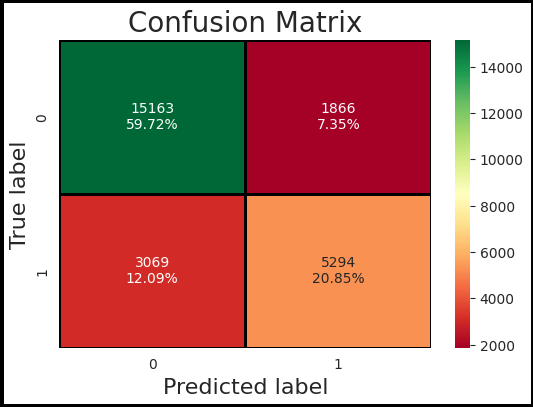

In [58]:
# Visualize confusion matrix for training
visualize_confusion_matrix(lg, X_train, y_train, threshold=0.5)

In [59]:
# Training classification peformance
log_reg_model_train_perf = model_classification_performance(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy  Recall  Precision   F1
0      0.81    0.63       0.74 0.68

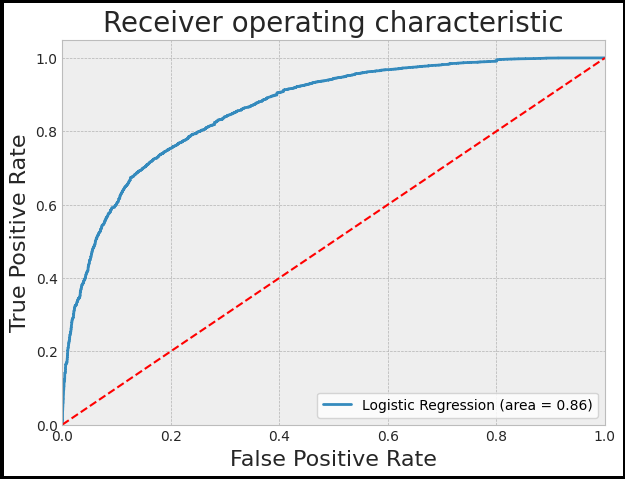

In [60]:
# Visualize ROC curve for training
visualize_roc_curve(lg, X_train, y_train)

### Optimize threshold using max difference of true positive and false positive rates

In [61]:
# Optimal threshold as per AUC-ROC curve
fpr, tpr, thresholds = roc_curve(y_train, lg.predict(X_train))

# Calculate the optimal cut off as where tpr the
# difference between tpr and fpr is maximal
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print("The optimal threshold is: ",
      round(optimal_threshold_auc_roc, 2),
      sep=""
      )

The optimal threshold is: 0.37


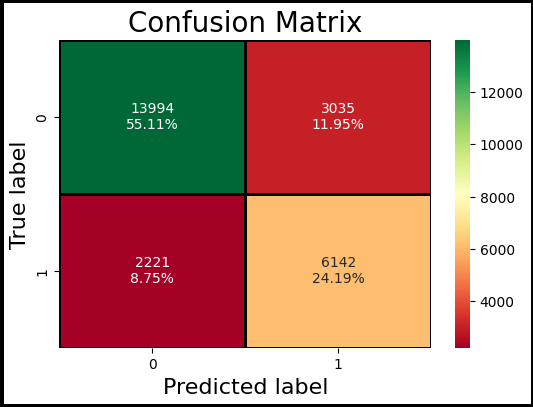

In [62]:
# Visualize confusion matrix for testing
visualize_confusion_matrix(lg,
                           X_train,
                           y_train,
                           threshold=optimal_threshold_auc_roc
                           )

In [63]:
# Testing classification performance
log_tpr_fpr_model_tr_perf = model_classification_performance(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

print("Training performance:")
log_tpr_fpr_model_tr_perf

Training performance:


Accuracy  Recall  Precision   F1
0      0.79    0.73       0.67 0.70

_Observations_: Using the threshold derived from the auc curve (0.37) increases F1 from 0.682 (0.5 threshold) to 0.700.

### Optimize threshold using Precision-Recall curve

In [64]:
# Define a finction to plot precision recall curve

def recall_vs_tresh_plot(precisions, recalls, thresholds):

    # Figure template
    plt.figure(figsize=(8, 5), edgecolor="black", linewidth=5)

    # Figure style
    plt.style.use("bmh")

    # Plot precision as a function of threshold
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")

    # Plot recall as a funciton of threshold
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")

    # Figure details
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel("Threshold", fontsize=16)
    plt.ylabel("Precision and Recall", fontdict={"size": 16})
    plt.title("Precision and Recall vs. Threshold", fontsize=20)
    plt.xlabel("Threshold")
    plt.legend(loc="lower left", fontsize=12, edgecolor="black")
    plt.ylim([0, 1])

    # Add line to indicate intersection of precision and recall
    plt.axvline(x=optimal_threshold_prec_rec,
                color="red",
                linestyle="--"
                )

    # Show plot
    plt.show()

In [65]:
# Get predicted scores for training
y_scores = lg.predict(X_train)

# Create arrays for precision, recall, and thresholds
prec, rec, tre = precision_recall_curve(
    y_train,
    y_scores,
)

# Identify threshold (where precision and recall intersect)
idx = np.where(prec == rec)
optimal_threshold_prec_rec = float(tre[idx])
print("The optimal threhsold is: ",
      round((optimal_threshold_prec_rec), 2),
      sep=""
      )

The optimal threhsold is: 0.42


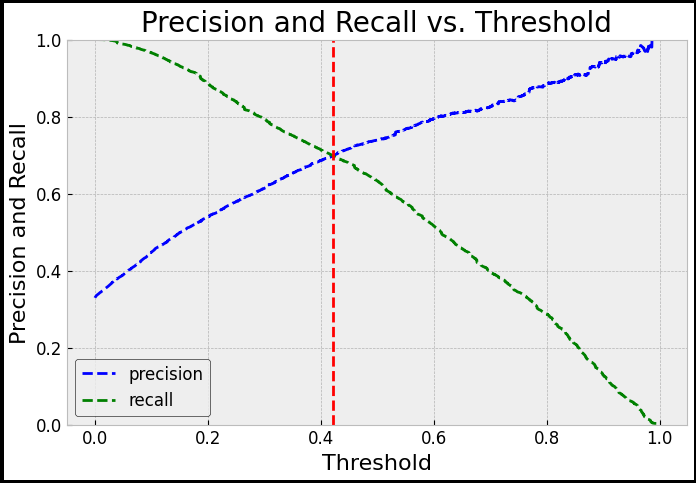

In [66]:
# Visualize precision recall plot
recall_vs_tresh_plot(prec, rec, tre)

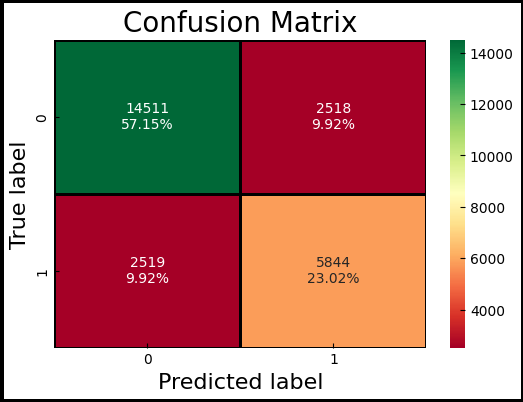

In [67]:
# Visualize confusion matrix for training
visualize_confusion_matrix(lg,
                           X_train,
                           y_train,
                           threshold=optimal_threshold_prec_rec
                           )

In [68]:
# Training model performance
log_prec_rec_model_tr_perf = model_classification_performance(
    lg, X_train, y_train, threshold=optimal_threshold_prec_rec
)
print("Training performance:")
log_prec_rec_model_tr_perf

Training performance:


Accuracy  Recall  Precision   F1
0      0.80    0.70       0.70 0.70

_Observations (training)_: Compared to the auc curve strategy for thresholding...
* Recall is lower by 0.035.
* Precision is higher by 0.03.
* F1 lower by 0.001.

### Comparison of model metrics (training)

In [69]:
# Comparing models with different thresholds
# training performance comparison

# Concatenate model performance outputs
models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_tpr_fpr_model_tr_perf.T,
        log_prec_rec_model_tr_perf.T,
    ],
    axis=1,
)

# Name models
models_train_comp_df.columns = [
    "Logistic Regression-0.50 Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-0.50 Threshold  \
Accuracy                                 0.81   
Recall                                   0.63   
Precision                                0.74   
F1                                       0.68   

           Logistic Regression-0.37 Threshold  \
Accuracy                                 0.79   
Recall                                   0.73   
Precision                                0.67   
F1                                       0.70   

           Logistic Regression-0.42 Threshold  
Accuracy                                 0.80  
Recall                                   0.70  
Precision                                0.70  
F1                                       0.70

_Observations_:
* The 0.50 threshold is best for accuracy.
* The 0.37 threshold is best for recall.
* The 0.50 threhsold is best for precision.
* The 0.37 threshold is best for F1.

### Comparison of model metrics (testing)

In [70]:
# Drop bad predictors from X_test
X_test = X_test[X_train.columns].astype(float)

#### Original Model (0.50 Threshold)

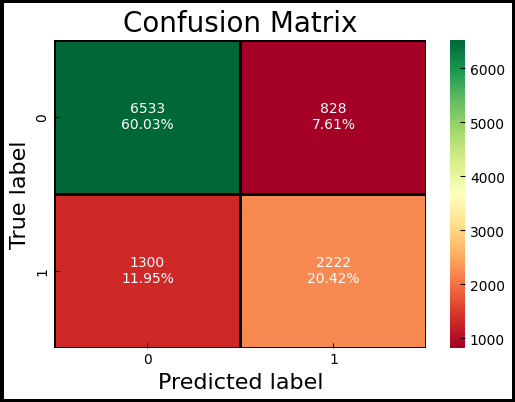

In [71]:
# creating confusion matrix using original (0.5 threshold) model
visualize_confusion_matrix(
    lg,
    X_test,
    y_test,
)

In [72]:
# Classification accuracy on testing data (0.5 threshold)
log_reg_model_test_perf = model_classification_performance(
    lg, X_test, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy  Recall  Precision   F1
0      0.80    0.63       0.73 0.68

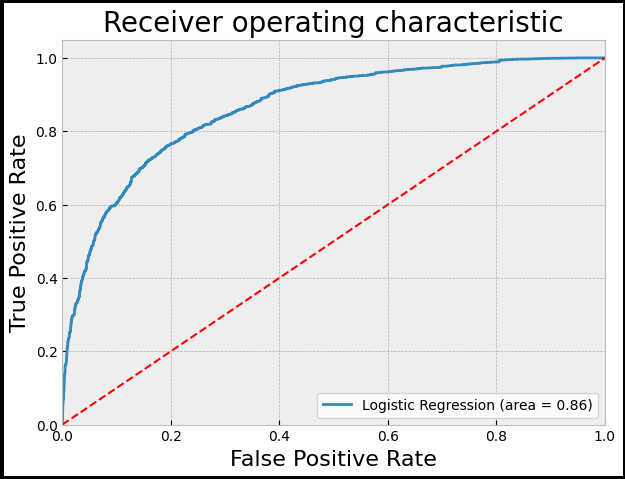

In [73]:
# Visualize ROC curve for testing
visualize_roc_curve(lg, X_test, y_test)

#### Using auc curve thresholding strategy (0.37)

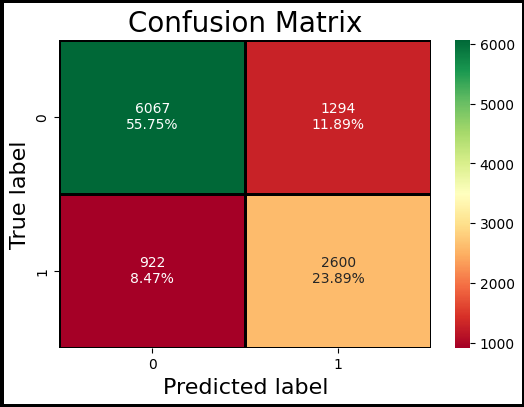

In [74]:
# creating confusion matrix using auc strategy (0.37 threshold)
visualize_confusion_matrix(lg, X_test, y_test, optimal_threshold_auc_roc)

In [75]:
# Classification accuracy on testing data (0.37 threshold)
log_tpr_fpr_model_tst_perf = model_classification_performance(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)

print("Testing performance:")
log_tpr_fpr_model_tst_perf

Testing performance:


Accuracy  Recall  Precision   F1
0      0.80    0.74       0.67 0.70

#### Using precision-recall strategy (0.42)

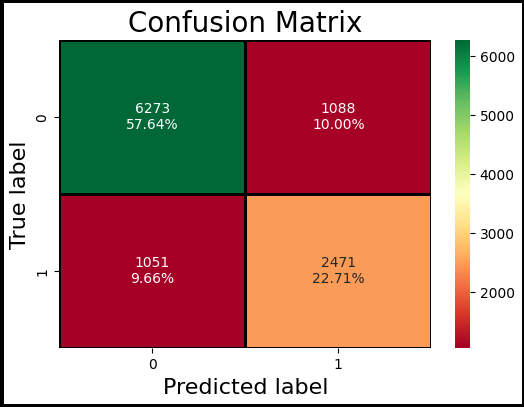

In [76]:
# creating confusion matrix using auc strategy (0.42 threshold)
visualize_confusion_matrix(lg, X_test, y_test, optimal_threshold_prec_rec)

In [77]:
# Classification accuracy on testing data (0.42 threshold)
log_prec_rec_model_tst_perf = model_classification_performance(
    lg, X_test, y_test, threshold=optimal_threshold_prec_rec
)

print("Testing performance:")
log_prec_rec_model_tst_perf

Testing performance:


Accuracy  Recall  Precision   F1
0      0.80    0.70       0.69 0.70

### Final Model Summary

In [78]:
# Model performance summary testing

# Concatenate model performance outputs
models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_tpr_fpr_model_tst_perf.T,
        log_prec_rec_model_tst_perf.T,
    ],
    axis=1,
)

# Name models
models_test_comp_df.columns = [
    "Logistic Regression-0.50 Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression-0.50 Threshold  \
Accuracy                                 0.80   
Recall                                   0.63   
Precision                                0.73   
F1                                       0.68   

           Logistic Regression-0.37 Threshold  \
Accuracy                                 0.80   
Recall                                   0.74   
Precision                                0.67   
F1                                       0.70   

           Logistic Regression-0.42 Threshold  
Accuracy                                 0.80  
Recall                                   0.70  
Precision                                0.69  
F1                                       0.70

_Observations_:

* The model that maximizes F1 uses a threshold of 0.37.
* The model with the threshold of 0.37 also shows good generalization as the value of 0.701 is close to the training set F1 value of 0.700.

#### Logistic Regression Conclusions

- A logistic regression model was built to determine which factors are most associated with canceled bookings.
- Many factors emerged as positive predictors of cancellations, such as
  - Booking in the year 2018 (vs. 2017)
  - Not selecting a meal plan
  - Canceling previous books
  - Selecting meal plan 2
  - Bringing children
  - Bookings with multiple adults
  - Booking on weekends
- Negative predictors include
  - Guests that have stayed in the past
  - Those that booked offline
  - Those that need a parking spot
  - Those with special requests
  - Those that prefer room types 2,4,5,6, and 7
  - Those who booked with corporate

These factor suggest that larger families staying for a longer period of time are more likely to cancel than single adults staying for a night or two. In contrast, bookings with a smaller number of children and adults with very specific requests that have stayed with INNHotels in the past reliably keep their bookings.

## Building a Decision Tree model

### Preparing Model

In [79]:
# Reload data to use decision tree modeling strategy
df_tree = pd.read_csv(
    "/content/drive/MyDrive/DSBA/06_Supervised_Learning_Classification/_project4/INNHotelsGroup.csv"
)

# Remove booking id column
df_tree = df_tree.drop("Booking_ID", axis=1)

In [80]:
# Change booking status data to ones and zeros
df_tree["booking_status"] = df_tree["booking_status"].map(
    {"Canceled": 1, "Not_Canceled": 0}
)

In [81]:
# Divide data into predictors and target
X = df_tree.drop(["booking_status"], axis=1)
y = df_tree["booking_status"]

In [82]:
# encoding the categorical variables
X = pd.get_dummies(X, drop_first=True)
X.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

   required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                           0        224          2017             10   
1                           0          5          2018             11   
2                           0          1          2018              2   
3                           0        211          2018              5   
4                           0         48          2018              4   

   arrival_date  repeated_guest  ...  room_type_reserved_Room_Type 2  \
0             2               0  ...                           False   
1             6               0  ...                           False   
2            28               0  ...                           False   
3            20               0  ...                           False   
4            11               0  ...                           False   

   room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
0                           False                           False   
1                           False                           False   
2                           False                           False   
3                           False                           False   
4                           False                           False   

   room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
0                           False                           False   
1                           False                           False   
2                           False                           False   
3                           False                           False   
4                           False                           False   

   room_type_reserved_Room_Type 7  market_segment_type_Complementary  \
0                           False                              False   
1                           False                              False   
2                           False                              False   
3                           False                              False   
4                           False                              False   

   market_segment_type_Corporate  market_segment_type_Offline  \
0                          False                         True   
1                          False                        False   
2                          False                        False   
3                          False                        False   
4                          False                        False   

   market_segment_type_Online  
0                       False  
1                        True  
2                        True  
3                        True  
4                        True  

[5 rows x 27 columns]

In [83]:
# Change booleans to binary
X = X.astype(int)
X.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

   required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                           0        224          2017             10   
1                           0          5          2018             11   
2                           0          1          2018              2   
3                           0        211          2018              5   
4                           0         48          2018              4   

   arrival_date  repeated_guest  ...  room_type_reserved_Room_Type 2  \
0             2               0  ...                               0   
1             6               0  ...                               0   
2            28               0  ...                               0   
3            20               0  ...                               0   
4            11               0  ...                               0   

   room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 7  market_segment_type_Complementary  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   market_segment_type_Corporate  market_segment_type_Offline  \
0                              0                            1   
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            0   

   market_segment_type_Online  
0                           0  
1                           1  
2                           1  
3                           1  
4                           1  

[5 rows x 27 columns]

In [84]:
# Split into training and testing data (70:30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

In [85]:
# Look at size of training and testing data
print("-" * 50)

print("Number of rows in training data =", X_train.shape[0])

print(
    "This is", round(X_train.shape[0] / X.shape[0], 2) * 100,
    " % of the entire dataset"
)

print("-" * 50)

print("Number of rows in testings data =",
      X_test.shape[0])

print(
    "This is", round(X_test.shape[0] / X.shape[0], 2) * 100,
    " % of the entire dataset"
)

print("-" * 50)

--------------------------------------------------
Number of rows in training data = 25392
This is 70.0  % of the entire dataset
--------------------------------------------------
Number of rows in testings data = 10883
This is 30.0  % of the entire dataset
--------------------------------------------------


In [86]:
# check percentages of classes in each data set
print("-" * 50)

print("Percentage of classes in training set:")

print(y_train.value_counts(normalize=True))

print("-" * 50)

print("Percentage of classes in test set:")

print(y_test.value_counts(normalize=True))

print("-" * 50)

--------------------------------------------------
Percentage of classes in training set:
booking_status
0   0.67
1   0.33
Name: proportion, dtype: float64
--------------------------------------------------
Percentage of classes in test set:
booking_status
0   0.68
1   0.32
Name: proportion, dtype: float64
--------------------------------------------------


_Observations_: Proportions of canceled and not canceled bookings are similar between training and testing sets.

In [87]:
# Initial model tree
model_orig = DecisionTreeClassifier(criterion="gini", random_state=1)
model_orig.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Evaluate model performance

In [88]:
# Make a function to calculate decision tree accuracy,
# recall, precision, and F1


def model_performance_classification_tree(model, predictors, target):

    # predicting target values using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [89]:
# Make a function to create a custom confusion
# matrix for tree model evaluation
def confusion_matrix_tree(model, predictors, target):

    # predicting target values using the independent variables
    y_pred = model.predict(predictors)

    # Create variable to hold confusion matrix data
    cm = confusion_matrix(target, y_pred)

    # Indicate labels for each box of confusion matrix
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    # Figure template
    plt.figure(figsize=(6, 4), edgecolor="black", linewidth=5)

    # Plot confusion matrix
    sns.heatmap(
        cm,
        annot=labels,
        fmt="",
        cmap="RdYlGn",
        linewidths=1,
        linecolor="black"
    )

    # Format y-label
    plt.ylabel("True label", fontdict={"size": 16})

    # Format x-label
    plt.xlabel("Predicted label", fontdict={"size": 16})

    # Format title
    plt.title("Confusion Matrix", fontsize=20)

#### Evaluating training fit

In [90]:
# Classification accuracy on training data (original tree)
dtree_perf_train = model_performance_classification_tree(model_orig,
                                                         X_train,
                                                         y_train
                                                         )

dtree_perf_train

Accuracy  Recall  Precision   F1
0      0.99    0.99       1.00 0.99

_Observations_: Nearly all metrics are high for the training set.

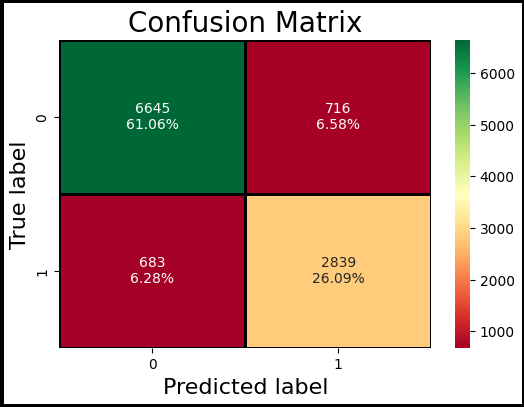

In [91]:
# Plot confusion matrix for original tree training data
confusion_matrix_tree(model_orig, X_test, y_test)

#### Evaluating testing fit

In [92]:
# Classification accuracy on testing data (original tree)
dtree_perf_test = model_performance_classification_tree(
    model_orig, X_test, y_test)
dtree_perf_test

Accuracy  Recall  Precision   F1
0      0.87    0.81       0.80 0.80

_Observations_:
* All performance metrics drop substantially at testing.
* The model does not appear to generalize well to testing data.

### Do we need to prune the tree?

#### Visualizing the Decision Tree

In [93]:
# define a function to visualize tree

def visualize_tree(model, feature_names):

    # Figure template
    plt.figure(figsize=(20, 20),
               edgecolor="black",
               linewidth=5
               )

    # Plot out entire tree
    out = tree.plot_tree(
        model,
        feature_names=feature_names,
        filled=True,
        fontsize=9,
        node_ids=True,
        class_names=True,
    )

    for o in out:
        arrow = o.arrow_patch
        if arrow is not None:
            arrow.set_edgecolor("black")
            arrow.set_linewidth(1)

    # Show plot
    plt.show()

In [94]:
# Get a list of attributes for decision tree
column_names = list(X.columns)
feature_names = column_names
feature_names

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests',
 'type_of_meal_plan_Meal Plan 2',
 'type_of_meal_plan_Meal Plan 3',
 'type_of_meal_plan_Not Selected',
 'room_type_reserved_Room_Type 2',
 'room_type_reserved_Room_Type 3',
 'room_type_reserved_Room_Type 4',
 'room_type_reserved_Room_Type 5',
 'room_type_reserved_Room_Type 6',
 'room_type_reserved_Room_Type 7',
 'market_segment_type_Complementary',
 'market_segment_type_Corporate',
 'market_segment_type_Offline',
 'market_segment_type_Online']

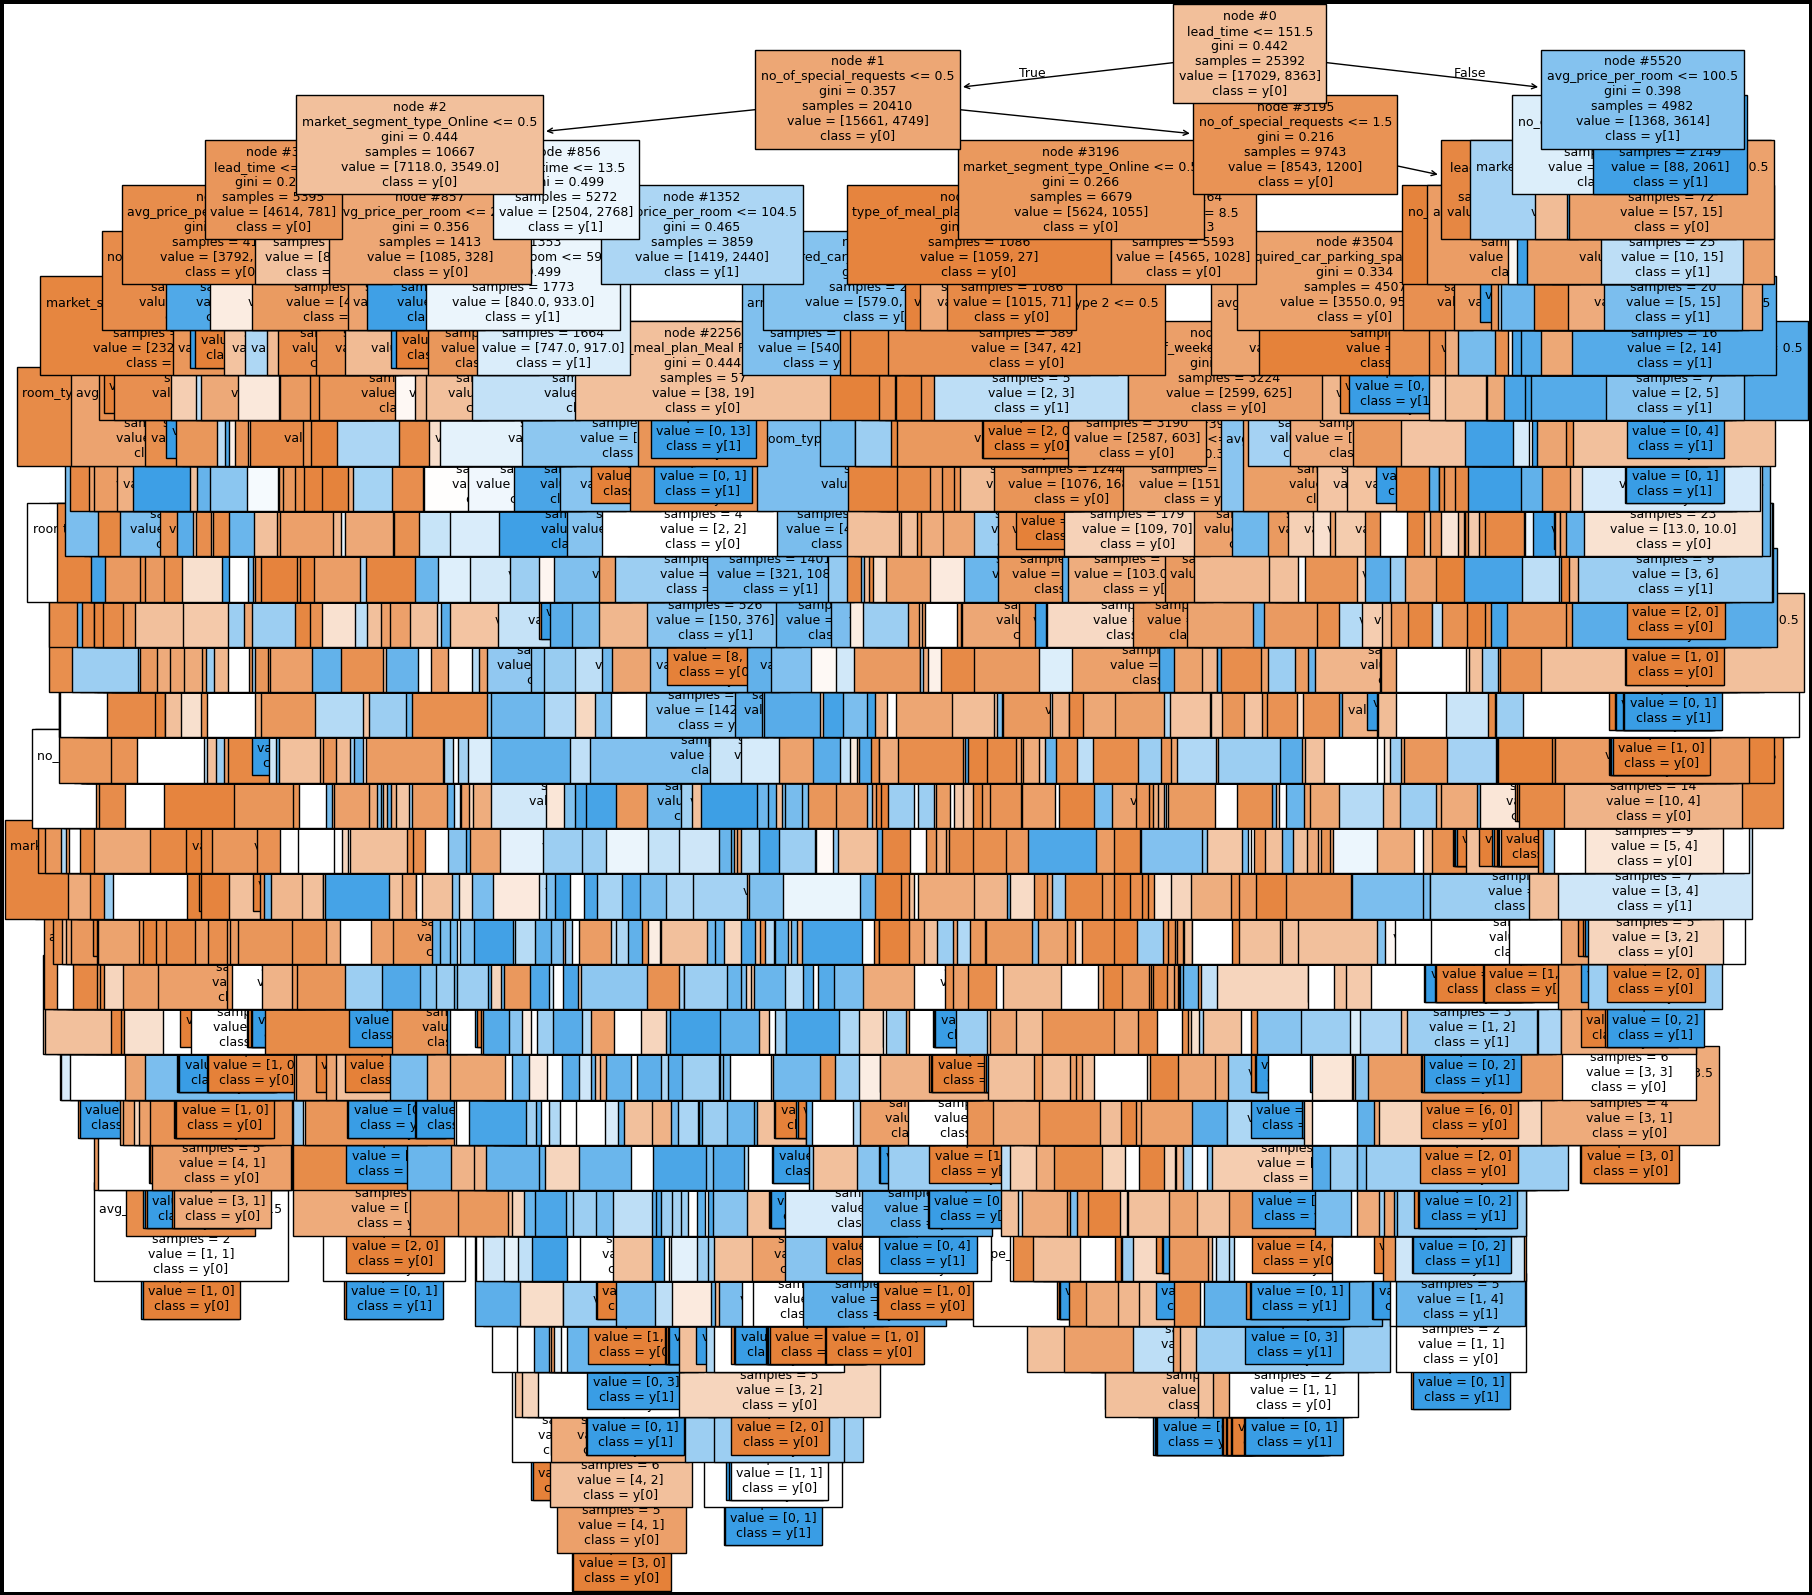

In [95]:
# Show un-pruned tree
visualize_tree(model_orig, feature_names)

In [96]:
# Text report showing the rules of a decision tree...
print(tree.export_text(model_orig,
                       feature_names=feature_names,
                       show_weights=True
                       ))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |   |   |--- lead_time >  11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- repeated_guest >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [147.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type

_Observations_: The decision tree seems to be highly complex and generalization to testing data is poor. It is best to examine pre- and post-pruning methods to decrease overfitting.

In [97]:
# Define function to list importances

def get_feature_importances(model, feature_names):

    # Put importances into variables
    importances = model.feature_importances_

    # Get indices of importances
    indices = np.argsort(importances)

    # Figure template
    plt.figure(figsize=(8, 8),
               edgecolor="black",
               linewidth=5
               )

    # Figure details
    plt.title("Feature Importances")

    # Make bar plot of importances
    plt.barh(
        range(len(indices)),
        importances[indices],
        color=["Red"],
        align="center",
        edgecolor="black",
        linewidth=2,
    )

    # Format x-ticks
    plt.xticks(fontsize=12)

    # Format y-ticks
    plt.yticks(range(len(indices)),
     [feature_names[i] for i in indices], fontsize=12
               )

    # Format y-label
    plt.ylabel("Feature", fontdict={"size": 16})

    # Format x-label
    plt.xlabel("Relative Importance", fontdict={"size": 16})

    # Show plot
    plt.show()

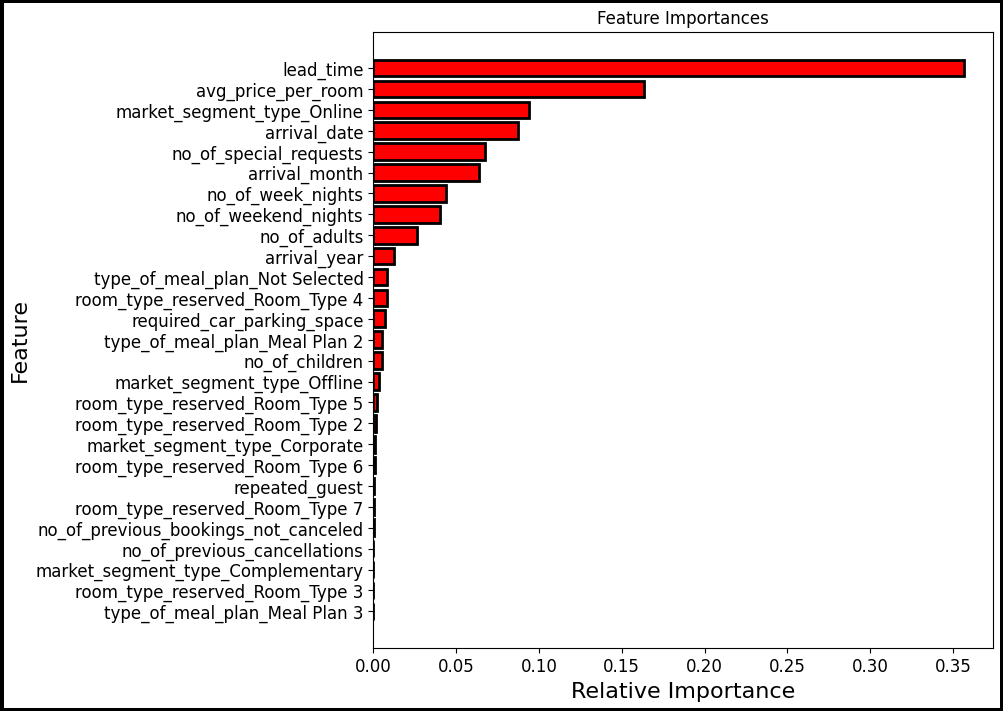

In [98]:
# Visualize tree importances
get_feature_importances(model_orig, feature_names)

_Observations_: For the original tree, the most important attributes are
* **lead_time**
* **avg_price_per_room**
* **market segment_type (online)**

### Pre-pruning to optimize F1

In [99]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": [np.arange(2, 50, 5), None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
    "max_leaf_nodes": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    "min_samples_split": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
}

# Type of scoring used to compare parameter combinations
f1_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=f1_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=100, min_impurity_decrease=1e-06,
                       min_samples_split=20, random_state=1)

#### Checking performance on training set

In [100]:
# Classification accuracy on training data (pre-pruned tree)
dtree_perf_train_pre_prune = model_performance_classification_tree(
    estimator, X_train, y_train
)

dtree_perf_train_pre_prune

Accuracy  Recall  Precision   F1
0      0.88    0.78       0.84 0.81

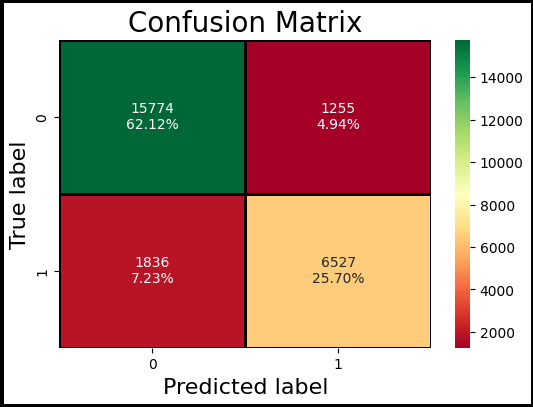

In [101]:
# Plot confusion matrix for pre-pruned tree training data
confusion_matrix_tree(estimator, X_train, y_train)

_Observations_: Overall the metrics for the training data are lower for the pre-pruned tree compared to the non-pruned tree.

#### Checking performance on testing set

In [102]:
# Classification accuracy on testing data (pre-pruned tree)
dtree_perf_test_pre_prune = model_performance_classification_tree(
    estimator, X_test, y_test
)

dtree_perf_test_pre_prune

Accuracy  Recall  Precision   F1
0      0.88    0.77       0.83 0.80

_Observations_: The pre-pruned model generalizes better from training (F1 = 0.809) to testing (F1 = 0.800) than the original non-pruned model.

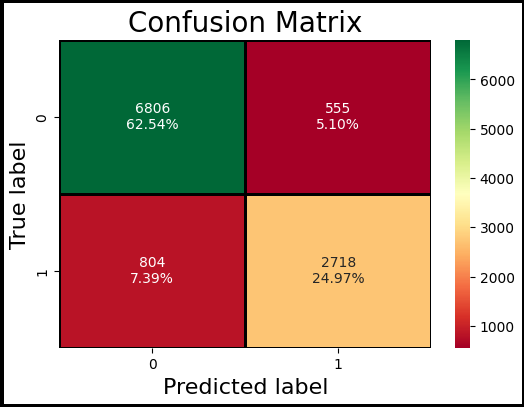

In [103]:
# Plot confusion matrix for pre-pruned tree testing data
confusion_matrix_tree(estimator, X_test, y_test)

_Observations (testing)_: Compared to the original tree metrics the pre-pruned tree has...
* Slightly higher accuracy
* Lower recall
* Higher precision
* Lower F1.

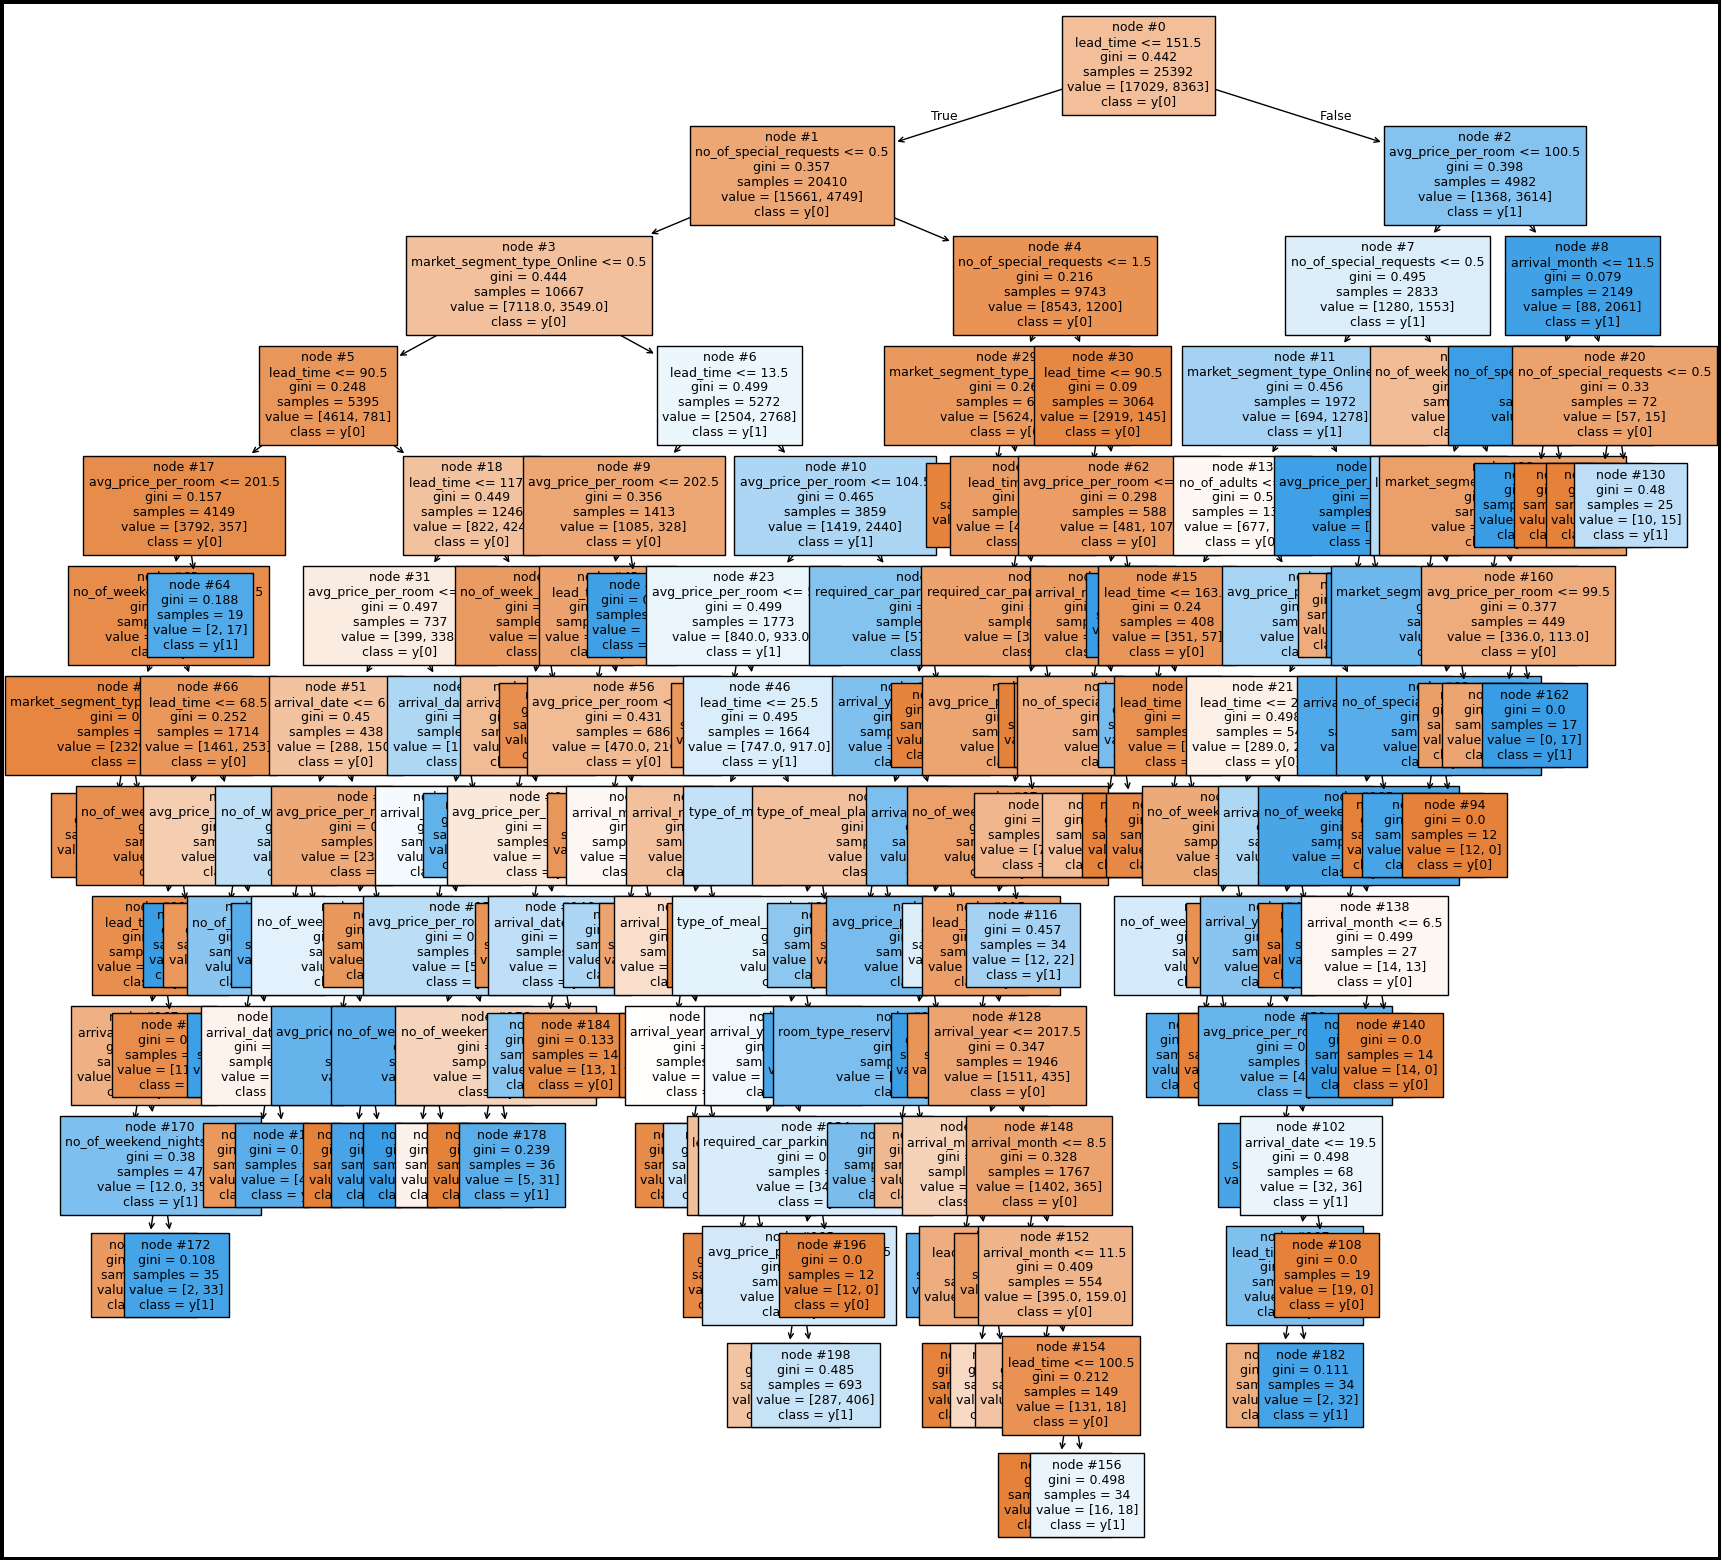

In [104]:
# Show pre-pruned tree
visualize_tree(estimator, feature_names)

In [105]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator,
                       feature_names=feature_names,
                       show_weights=True
                       ))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- weights: [720.00, 87.00] class: 0
|   |   |   |   |   |   |--- market_segment_type_Offline >  0.50
|   |   |   |   |   |   |   |--- weights: [1609.00, 0.00] class: 0
|   |   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |   |--- no_of_weekend_nights <= 4.50
|   |   |   |   |   |   |   |   |--- lead_time <= 1.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 27.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [95.00, 5.00] class: 0
|   |   |   |   |   |   |   |   |   |--- arrival_date >  27.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_weekend_ni

_Observations_: Recall on the testing data dropped between the non-pruned and pre-pruned models. However, the model is now much less complex.

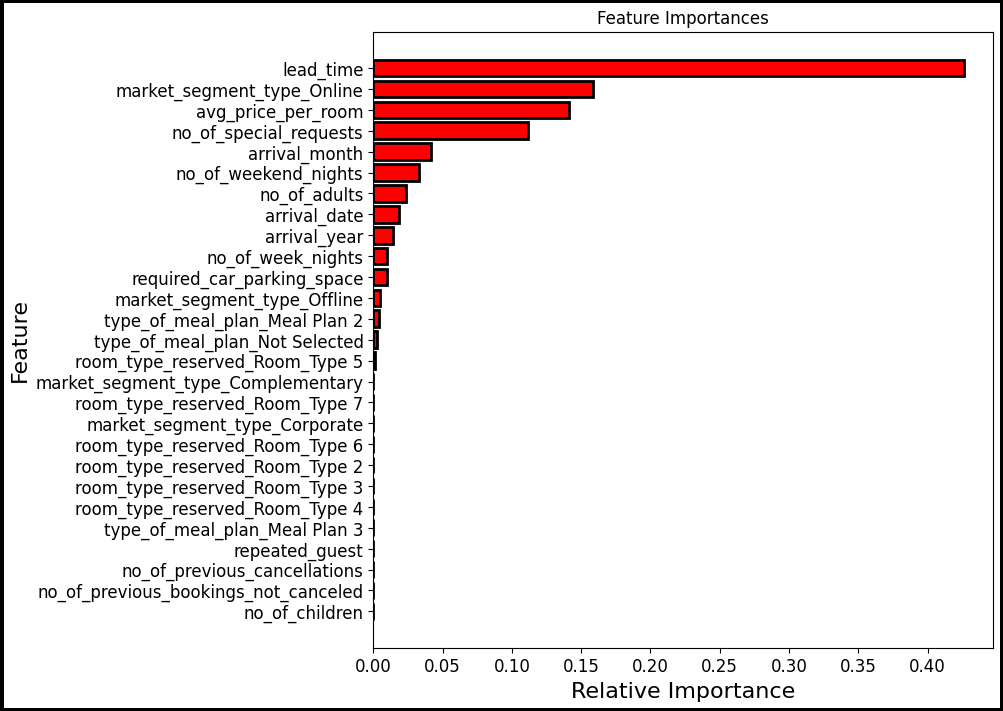

In [106]:
# Visualize tree importances (pre-pruned)
get_feature_importances(estimator, feature_names)

_Observations_: Importances are similar between the original and pre-pruned trees, except that avg_price_per_room is more important than the online market segment type in the orginal tree model.

### Post-pruning to optimize F1

In [107]:
# Cost complexity pruning
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

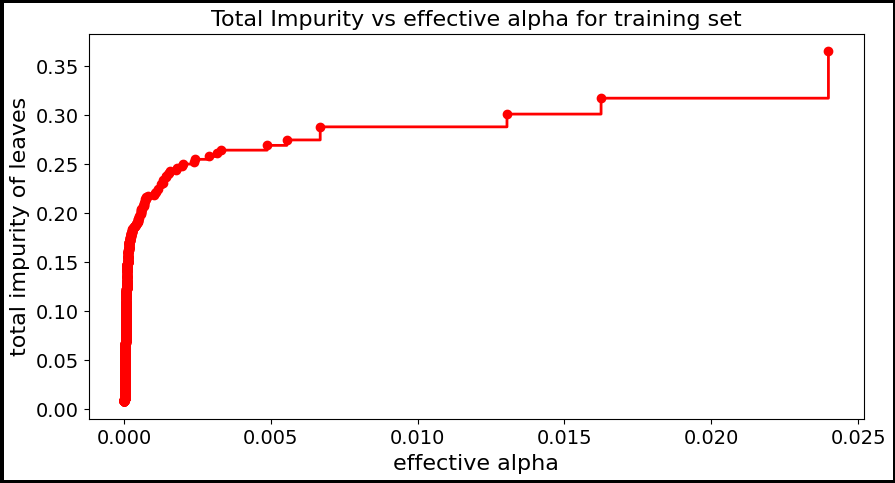

In [108]:
# Plot impurity of leaves by alpha

# Figure template
fig, ax = plt.subplots(figsize=(10, 5),
                       edgecolor="black",
                       linewidth=5
                       )

# Plot impurities aross alphas
ax.plot(
    ccp_alphas[:-1],
    impurities[:-1],
    marker="o",
    drawstyle="steps-post",
    color="Red",
    linewidth=2,
        )

# Format x-label
ax.set_xlabel("effective alpha",
              fontdict={"size": 16}
              )

# Format y-label
ax.set_ylabel("total impurity of leaves",
              fontdict={"size": 16}
              )

# Increase font of x and y ticks
ax.tick_params(axis="both", labelsize=14)

# Format title
ax.set_title("Total Impurity vs effective alpha for training set",
             fontdict={"size": 16}
             )

# Show plot
plt.show()

In [109]:
# Train a decision tree using the effective alphas (removing last alpha)

# Initialize variable
clfs = []

# Create decision trees for each alpha
for ccp_alpha in ccp_alphas:

    # Create decision tree
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)

    # Fit decision tree
    clf.fit(X_train, y_train)

    # Append the  fit value to clfs
    clfs.append(clf)

print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07657789477371363


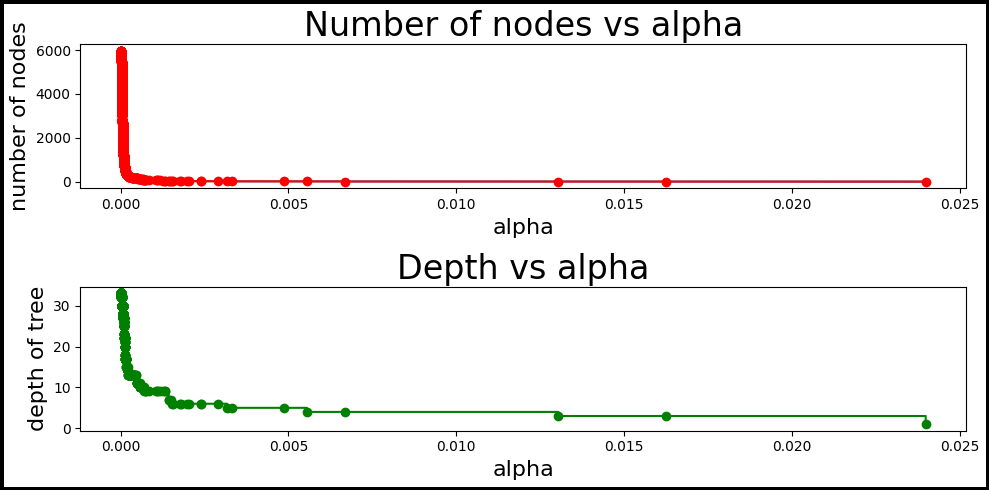

In [110]:
# Plot the number of nodes and depth by alpha

# Don't include the last tree since it is too simple (1 node)
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Gater node counts for each tree
node_counts = [clf.tree_.node_count for clf in clfs]

# Gater depths for each tree
depth = [clf.tree_.max_depth for clf in clfs]

# Figure template
fig, ax = plt.subplots(2,
                       1,
                       figsize=(10, 5),
                       edgecolor="black",
                       linewidth=5
                       )

# Figure details (Nodes figure)
ax[0].plot(ccp_alphas, node_counts)

ax[0].plot(ccp_alphas,
           node_counts,
           marker="o",
           color="Red",
           drawstyle="steps-post"
           )

ax[0].set_xlabel("alpha", fontsize=16)
ax[0].set_ylabel("number of nodes", fontsize=16)
ax[0].set_title("Number of nodes vs alpha", fontsize=24)

# Figure details (Nodes figure)
ax[1].plot(ccp_alphas,
           depth,
           marker="o",
           color="Green",
           drawstyle="steps-post"
           )

ax[1].set_xlabel("alpha", fontsize=16)
ax[1].set_ylabel("depth of tree", fontsize=16)
ax[1].set_title("Depth vs alpha", fontsize=24)

fig.tight_layout()

#### F1 vs alpha for training and testing sets

In [111]:
# F1 values for each alpha (training)
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

In [112]:
# F1 values for each alpha (testing)
f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

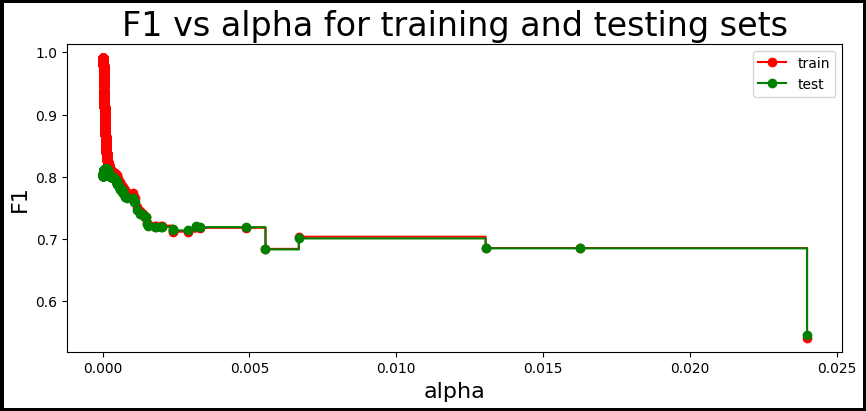

In [113]:
# Create plot showing recall as a function of alpha
# for training and testing

# Figure template
fig, ax = plt.subplots(figsize=(10, 4), edgecolor="black", linewidth=5)

# Format x-label
ax.set_xlabel("alpha", fontsize=16)

# Format y-label
ax.set_ylabel("F1", fontsize=16)

# Format title
ax.set_title("F1 vs alpha for training and testing sets", fontsize=24)

# Plot recall as a function of alphas (training)
ax.plot(
    ccp_alphas,
    f1_train,
    marker="o",
    color="red",
    label="train",
    drawstyle="steps-post",
)

# Plot recall as a function of alphas (testing)
ax.plot(
    ccp_alphas,
    f1_test,
    marker="o",
    color="green",
    label="test",
    drawstyle="steps-post",
)

# Show legend
ax.legend()

# Show plot
plt.show()

In [114]:
# creating the model with the highest train and test F1
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0001550030679088378),
                       random_state=1)


#### Evaluate model performance (training)

In [115]:
# Performance metrics for post-pruned tree (training)
dtree_perf_train_post_prune = model_performance_classification_tree(
    best_model, X_train, y_train
)

dtree_perf_train_post_prune

Accuracy  Recall  Precision   F1
0      0.89    0.81       0.85 0.83

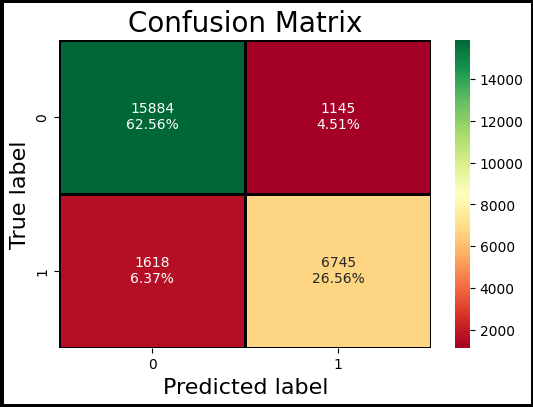

In [116]:
# Visualize confusion matrix for training
confusion_matrix_tree(best_model, X_train, y_train)

_Observations_:
* Overall the metrics for the training data are similar between the pre- and post-pruned trees.
* Training metrics are much higher for the original non-pruned tree.

#### Evaluate model performance (testing)

In [117]:
# Performance metrics for post-pruned tree (testing)
dtree_perf_test_post_prune = model_performance_classification_tree(
    best_model, X_test, y_test
)

dtree_perf_test_post_prune

Accuracy  Recall  Precision   F1
0      0.88    0.79       0.84 0.81

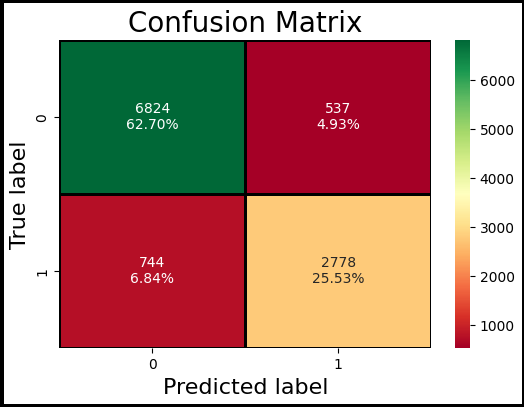

In [118]:
# Visualize confusion matrix for testing
confusion_matrix_tree(best_model, X_test, y_test)

_Observations_:
* Overall, F1 for the testing data is better for the post-pruned model compared to the original and pre-pruned models.
* For the post-pruned model, F1 drops slightly from training (0.830) to teting (0.803), suggesting that this model generalizes pretty well.

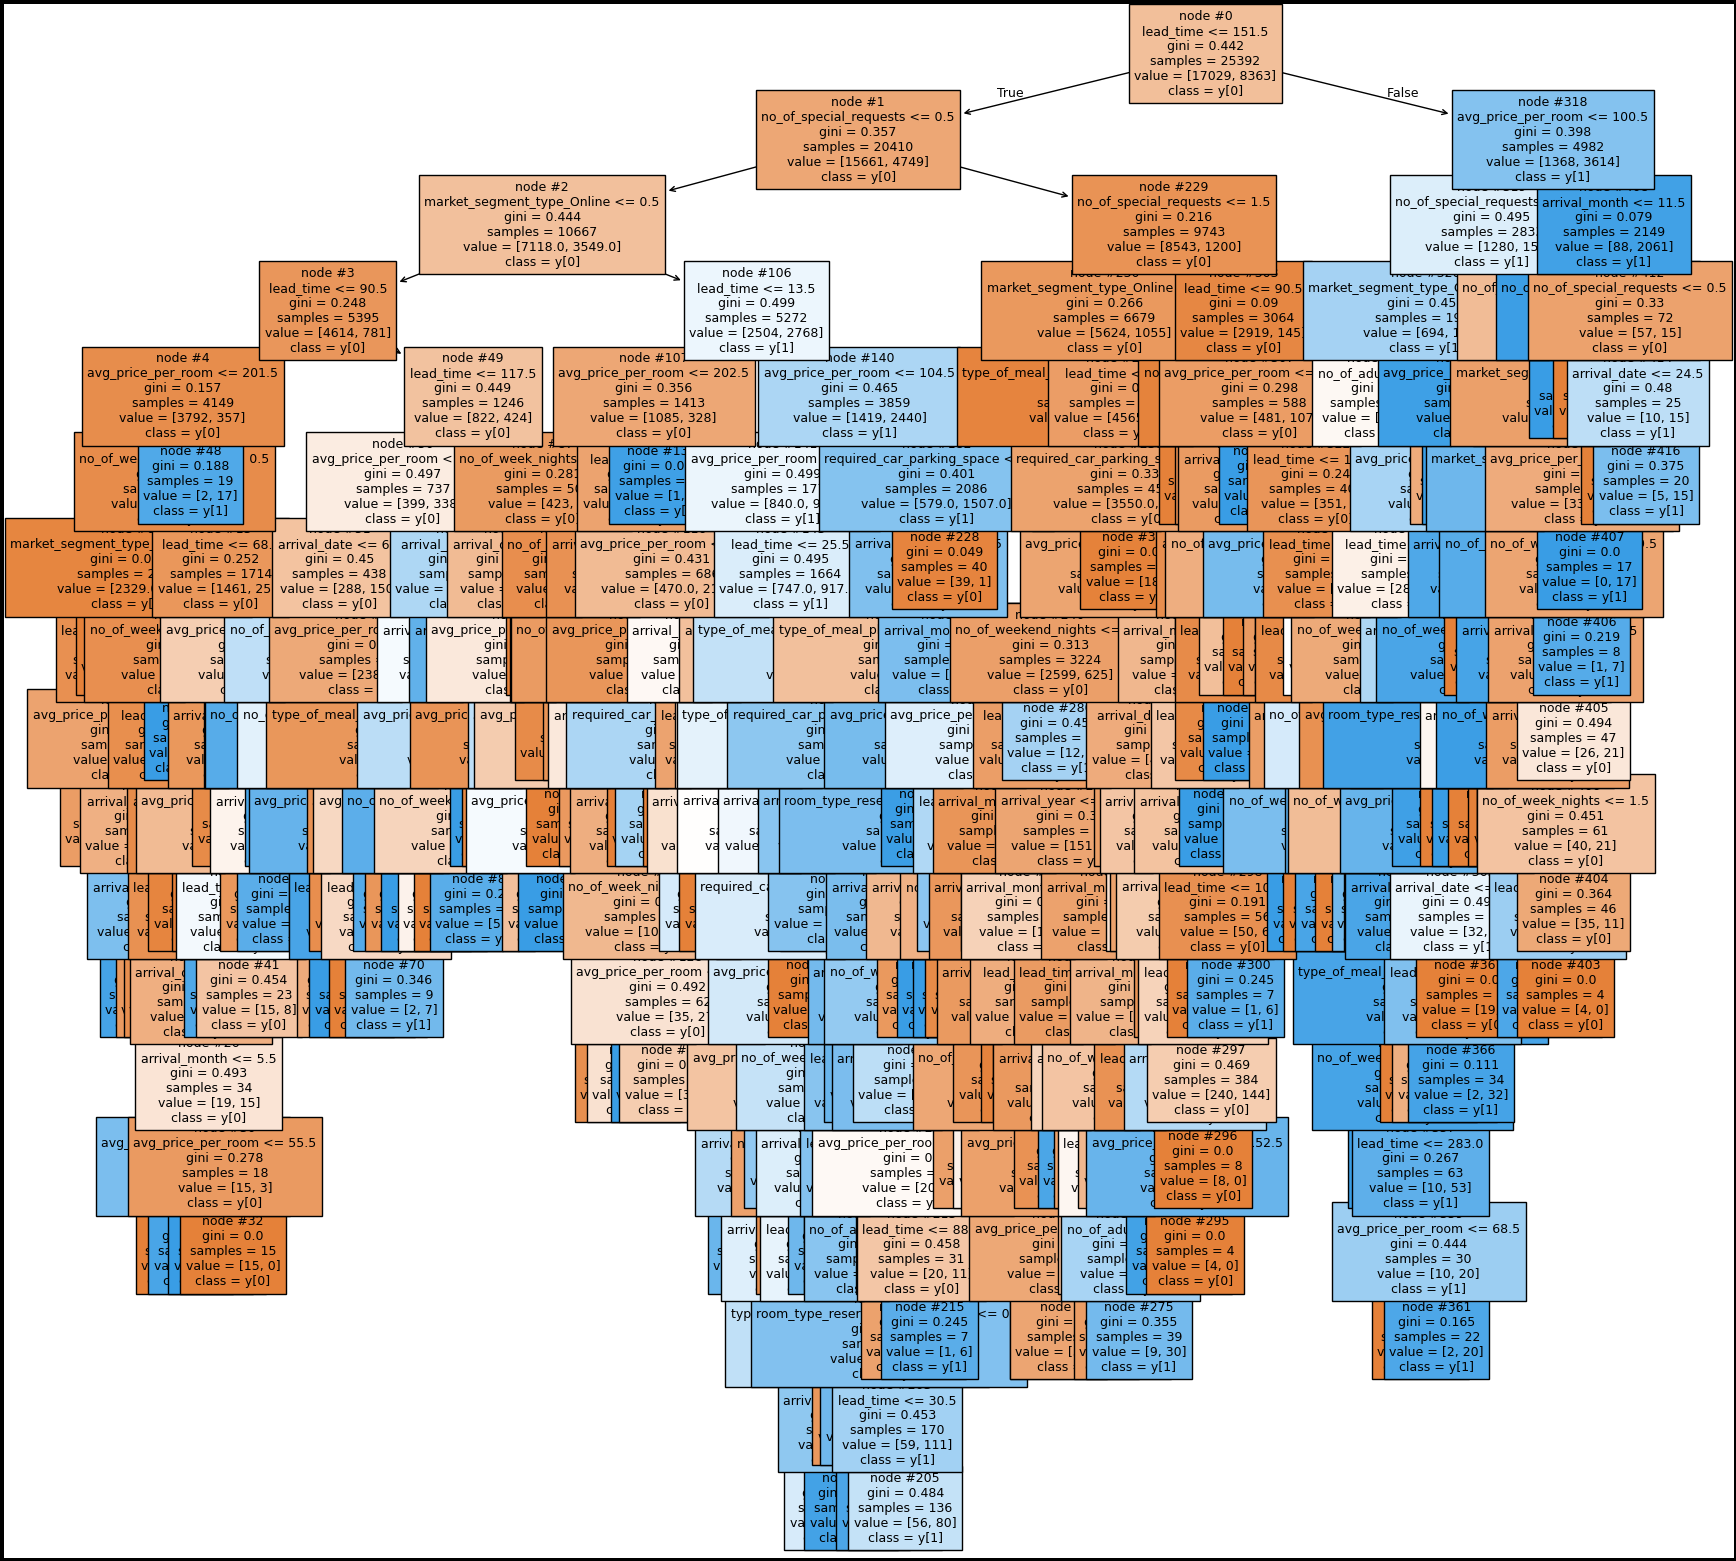

In [119]:
# Visualize tree
visualize_tree(best_model, feature_names)

In [120]:
# Text report showing the rules of a decision tree
print(tree.export_text(best_model,
                       feature_names=feature_names,
                       show_weights=True
                       ))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- weights: [558.00, 43.00] class: 0
|   |   |   |   |   |   |   |--- lead_time >  16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 135.00
|   |   |   |   |   |   |   |   |   |--- weights: [162.00, 36.00] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  135.00
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 8.00] class: 1
|   |   |   |   |   |   |--- market_segment_type_Offline >  0.50
|   |   |   |   |   |   |   |--- weights: [1609.00, 0.00] class: 0
|   |   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |   |--- lead_time <= 

_Observations_: F1 on the testing data improved between the non-pruned and post-pruned models and the model is now much less complex.

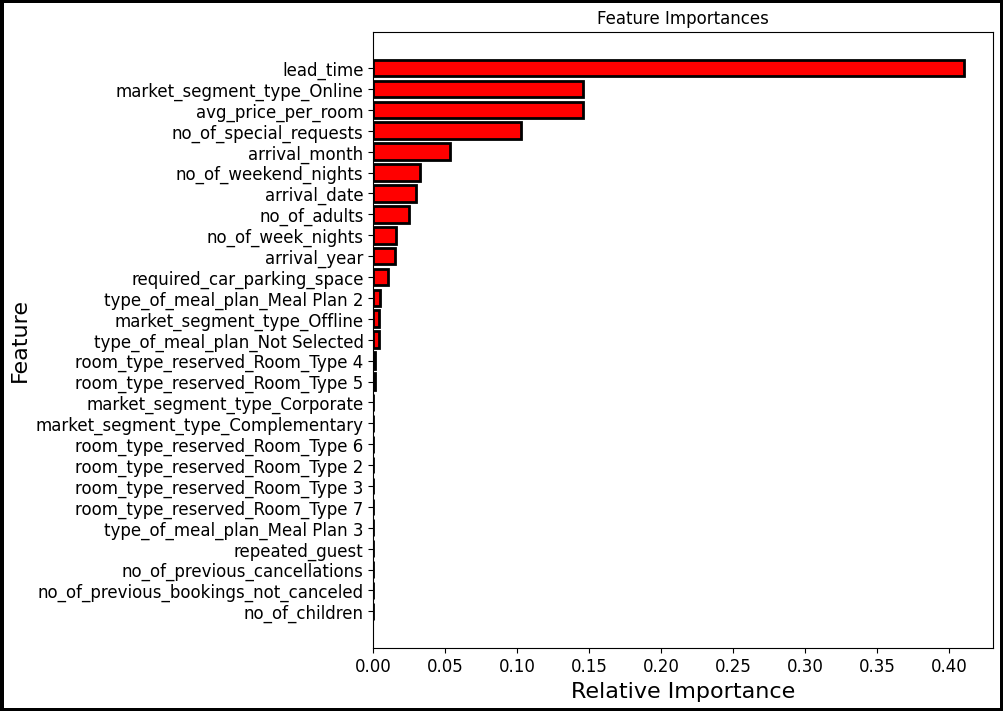

In [121]:
# Visualize tree importances
get_feature_importances(best_model, feature_names)

_Observations_: Importances are similar to pre-pruned model.

### Model Performance Comparison and Conclusions

In [122]:
# training performance comparison
models_train_comp_df = pd.concat(
    [
        dtree_perf_train.T,
        dtree_perf_train_pre_prune.T,
        dtree_perf_train_post_prune.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree original",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree original  Decision Tree (Pre-Pruning)  \
Accuracy                     0.99                         0.88   
Recall                       0.99                         0.78   
Precision                    1.00                         0.84   
F1                           0.99                         0.81   

           Decision Tree (Post-Pruning)  
Accuracy                           0.89  
Recall                             0.81  
Precision                          0.85  
F1                                 0.83

_Observations (training)_:
* The pre-pruned model performs the worst on training data.
* Although the original model has great metrics for training, it doesn't appear to generalize well to testing data.
* The pre- and post-pruned models are far simpler than the original model.

In [123]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_perf_test.T,
        dtree_perf_test_pre_prune.T,
        dtree_perf_test_post_prune.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree original",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


Decision Tree original  Decision Tree (Pre-Pruning)  \
Accuracy                     0.87                         0.88   
Recall                       0.81                         0.77   
Precision                    0.80                         0.83   
F1                           0.80                         0.80   

           Decision Tree (Post-Pruning)  
Accuracy                           0.88  
Recall                             0.79  
Precision                          0.84  
F1                                 0.81

_Observations (testing)_: The best model for...
* Accuracy is the post-pruned model
* Recall is the original model
* Precision is the post-pruned model
* F1 is the post-pruned model

In [124]:
# Plot the top 10 importances for each model

# Print out the most important nodes in the original decision tree
orig_importances = model_orig.feature_importances_
orig_indices = np.argsort(orig_importances)
orig_features = [feature_names[i] for i in orig_indices]
orig_features = orig_features[::-1]

# Print out the most important nodes in the pre-pruned decision tree
pre_importances = estimator.feature_importances_
pre_indices = np.argsort(pre_importances)
pre_features = [feature_names[i] for i in pre_indices]
pre_features = pre_features[::-1]


# Print out the most important nodes in the post-pruned decision tree
post_importances = best_model.feature_importances_
post_indices = np.argsort(post_importances)
post_features = [feature_names[i] for i in post_indices]
post_features = post_features[::-1]

models = pd.DataFrame({'orig_importances': orig_features,
                       'pre_pruned_importances': pre_features,
                       'post_pruned_importances': post_features
                        })
models.head(10)

orig_importances      pre_pruned_importances  \
0                   lead_time                   lead_time   
1          avg_price_per_room  market_segment_type_Online   
2  market_segment_type_Online          avg_price_per_room   
3                arrival_date      no_of_special_requests   
4      no_of_special_requests               arrival_month   
5               arrival_month        no_of_weekend_nights   
6           no_of_week_nights                no_of_adults   
7        no_of_weekend_nights                arrival_date   
8                no_of_adults                arrival_year   
9                arrival_year           no_of_week_nights   

      post_pruned_importances  
0                   lead_time  
1  market_segment_type_Online  
2          avg_price_per_room  
3      no_of_special_requests  
4               arrival_month  
5        no_of_weekend_nights  
6                arrival_date  
7                no_of_adults  
8           no_of_week_nights  
9                arrival_year

### Decision tree Conclusions

* Decision tree models were created to determine the factors that are associated with canceled bookings.
  * Original tree
  * Pre-pruned tree
  * Post-pruned tree
* All models rank **lead time**, **avg_price_per_room**, **market_segment_type_Online**, and **no_special_requests** as important factors for predicting cancellations. By visualizing the trees, it appears that:
  * Booking farther out from the arrival day leads to more cancellations.
  * Booking online is associated with more cancellations.
  * Making more special requests is associated with a decreased likelihood of cancellation.
  * More expensive rooms are more likely to be cancelled.
* The optimal model to predict cancelations is the post-pruned model, as it has the highest testing F1.
* An argument can be made that the original and post-pruned models are both overfit becuase their is a large difference between their training performance (original F1: 0.991; post-pruned: 0.830) and their testing performance (original F1: 0.802; post-pruned: 0.813).
* The pre-pruned model, however, shows a smaller difference between trianing (F1 = 0.809) and testing (F1 = 0.800).
* Overall, since the pre-pruned model shows the best generalization and is simpler than the non-pruned model, it is the most likely to help the company identify future cancellations.

## Actionable Insights and Recommendations

There are similarities and differences between the logistic regression and decision tree models.

* <u>Similarities</u>: When comparing the change odds percentage of the logistic regression and the importances of the decision tree models, both identify **no_of_week_nights**, **arrival_year**, **no_of_special_requests**, **no_of_weekend_nights**, and **no_of_adults** as important predictors of cancellations.

* <u>Differences</u>: Whereas the decision tree model identifies **lead_time**, **market_segment_type_Online**, **avg_price_per_room**, and **arrival_date** as important attributes, these attributes were either dropped from the logsitic regression model or had low change odds percentages.

* Both models support that guests who book a room for one or two adults and no children for several weekdays and weeknights and have special requests tend to stick with their booking. This might be indicative of a frequent traveler that needs to stay somewhere temporarily for work or as a layover between flights.

* In contrast, a guest that books with more adults and children for longer periods of time (lasting weekdays and weeknights) tends to cancel more often. This might be indicative of a family traveling on vacation. In this case, it is understandable that they would have more cancellations as larger families/groups are more likely to have schedule changes (e.g., sick kids, changes in finances, etc.).

* In general, the F1 metric supports that the decision tree models are  superior at predicting cancellations than the logistic regression models. The pre-pruned decision tree in particular balances complexity with good generalizability. It would be advantageous of INNHotels to follow the pre-pruned decision tree to predict cancellations.

### What profitable policies for cancellations and refunds can the hotel adopt?

1.   The pre-pruned decision tree suggests that lead time of booking is an important factor and that booking too far out (~150 days) could lead to more cancellations. This is understandable as more unpredictable events are likely to occur with more time. It might be appropriate for INNHotels to **increase the cancellation fee for guests booking 150 or more days out**. Alternatively, the company could **provide consistent reminders to guests with higher lead times** to make sure they are still interested in keeping their bookings. An automated email that requires a confirmation each month might help guests remember they still have a booking.
2.   Repeated guests are very loyal and less likely to cancel. **A promotion for new customers offering a discount for another stay** may help turn those customers into regular guests and subsequently decrease the proportion of cancellations for INNHotels.
3. Although guests who book with more adults and children are more likely to cancel, they likely drive more revenue than a single traveler. Therefore, it makes sense to incentive their stay rather than discourage them from booking. **Offering larger groups incentives between the time of their booking and their arrival date** might keep them from canceling. For example, an email stating "You qualify for free breakfast on one day of your stay!" This would also prevent these larger groups from forgetting about their bookings.
4. Booking online is convenient but also makes it easy to cancel, especially at the last minute. While discouraging online bookings may not be the best strategy for increasing customer satisfaction, it might help the company to **require the customer to cancel with an AI chatbot or live person** so that they it/they can offer a discount for keeping their booking. This would help reduce the number of online cancellations.
5. Since transient business travelers are a reliable source of revenue, it would be wise to solidify this customer base by **offering discounts for repeated stays to short-term travelers** or **offering a rewards program to keep short-term travelers coming back**.
6. More expensive rooms are more likely to be cancelled. It may be wise to **charge a fee for canceling that is commensurate with the price of the room**. For example, canceling a cheap room should have a smaller fee than an expensive one. This could prevent guests from whimsically booking more expensive rooms in the first place, allowing more reliable guests to stay in them.

### What other recommedations would you suggest to the hotel?

While the above recommendations might help the company reduce cancellations, the company must enact policy cautiously. Although the models suggest that certain types of customers are more likely to cancel, getting this wrong may alienate potentially loyal customers. Investigating other factors may help the company more precisely identify potential cancellations through better models:
  * <u>Travelling for business or pleasure</u>: Business trips may yield lower cancellations than personal ones.
  * <u>Reason for staying</u>: Perhaps there is an attraction, conference, or event that is associated with higher cancellations.
  * <u>Hotel</u>: Perhaps a particular INNHotel is mismanaged or associated with a higher rate of cancellations than others.
  * <u>Hotel City</u>: Perhaps there is a particular city associated with more cancellations.
  * <u>Hotel Country</u>: Perhaps there is a particular country associated with more cancellations.
  * <u>Booker's country</u>: Perhaps guests travelling from far away are more likely to cancel.
  * <u>Booker's age</u>: Younger guests may be more likely to cancel.